## FORMULA 1 - 2023 SEASON ANALYSIS
## Created by Collins 


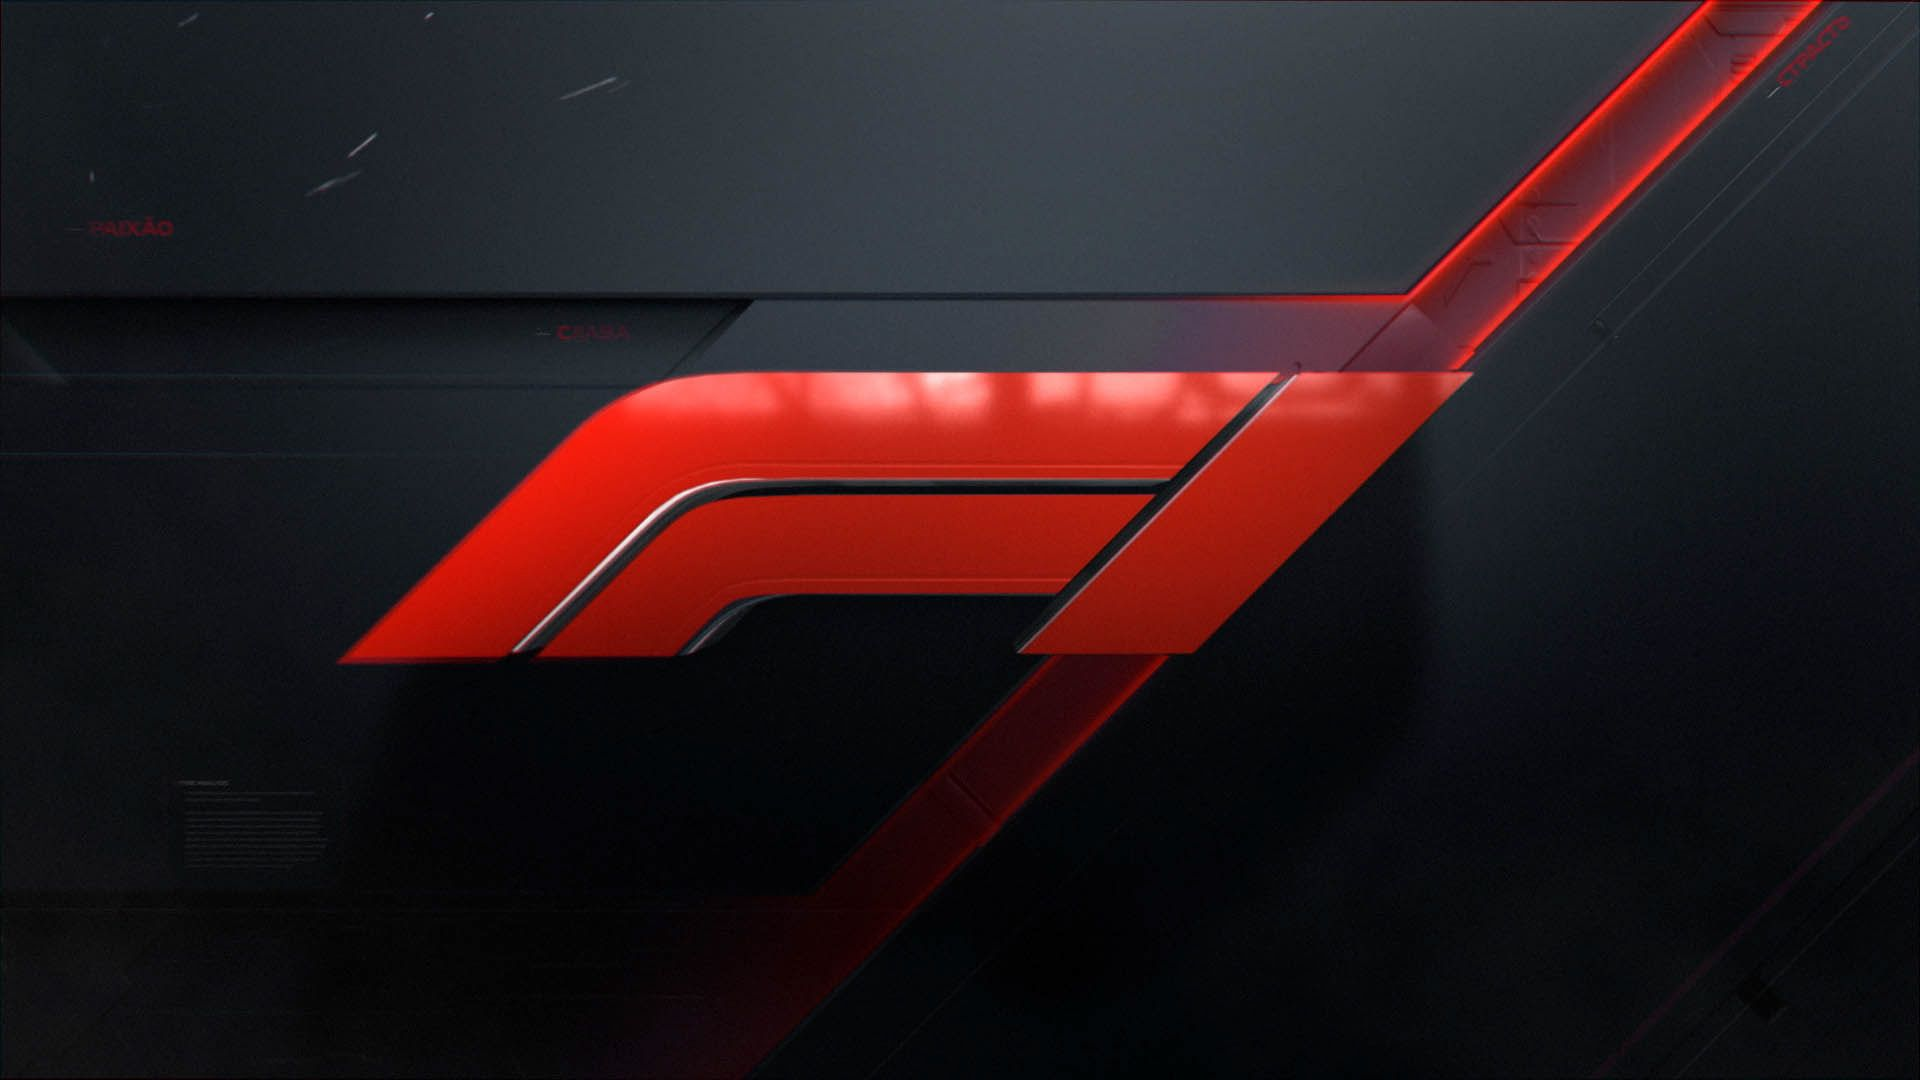

In [2]:
from IPython.display import Image
Image(r'C:\Users\myloc\Downloads\1F.jpg')

## WELCOME TO THE DATA ANALYSIS OF FORMULA 1 2023 SEASON!

The 2023 Formula 1 season was dominated by **Max Verstappen and Red Bull Racing.** Verstappen secured his third consecutive Drivers' Championship title, winning a **record-breaking 19 out of 22 races and finishing on the podium 21 times.** His performance set a new benchmark in F1 history, surpassing previous records for the highest percentage of race wins in a season.

Red Bull Racing also achieved remarkable success, **winning 21 out of the 22 Grands Prix,** which led them to their sixth Constructors' Championship title. This level of dominance by a single team and driver is unprecedented in modern F1 history.

In terms of driver dynamics, the season saw the emergence of new talents like **Oscar Piastri,** who made a strong debut with **McLaren**, and **Logan Sargeant,** who faced a challenging rookie year with **Williams.** The season was not just about the frontrunners, as teams like **Ferrari** and **Mercedes** had their moments, with **Charles Leclerc** and **Lewis Hamilton** showing flashes of brilliance despite not being able to consistently challenge Verstappen.

The season also highlighted some intense intra-team battles, particularly within **Alpine** and **Alfa Romeo**, where drivers were closely matched, leading to competitive and unpredictable results.

Overall, the 2023 season will be remembered for **Verstappen's unparalleled dominance** and the continuation of Red Bull's winning streak, setting the stage for what we hope  could be another historic season in 2024.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline

In [5]:
import matplotlib.font_manager as fm

# Path to the custom font file
font_path = r'C:\Users\myloc\Downloads\Retro impact.otf'

# Add the custom font to the font manager
fm.fontManager.addfont(font_path)

# Optionally, set the font as the default for plots
plt.rcParams['font.family'] = 'Retro impact'

In [6]:
#Loading the datasets
csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_calendar.csv'
Season2023Calendar = pd.read_csv(csv_file_path)
Season2023Calendar.set_index('Round', inplace=True)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_drivers.csv'
Season2023Drivers = pd.read_csv(csv_file_path)
Season2023Drivers.set_index('Abbreviation', inplace=True)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_teams.csv'
Season2023Teams = pd.read_csv(csv_file_path)
Season2023Teams.index = range(1,11)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_qualifyingResults.csv'
Season2023QualifyingResults = pd.read_csv(csv_file_path)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_sprintResults.csv'
Season2023SprintRaceResults = pd.read_csv(csv_file_path)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_sprintShootoutResults.csv'
Season2023SprintShootoutResults = pd.read_csv(csv_file_path)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_raceResults.csv'
Season2023RaceResults = pd.read_csv(csv_file_path)

csv_file_path = r'C:\Users\myloc\Downloads\Formula1_2023season_driverOfTheDayVotes.csv'
Season2023DotdVotes = pd.read_csv(csv_file_path)
Season2023DotdVotes.set_index('Track', inplace=True)

In [7]:
#Adding colors to drivers according to the teams they represent
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','BOT','ZHO']:           cl.append('#900000')
        elif abbr in ['HAAS','HUL','MAG']:         cl.append('#ffffff')
        elif abbr in ['ASTO','ALO','STR']:         cl.append('#006f62')
        elif abbr in ['WILL','ALB','SAR']:         cl.append('#0072ff')
        elif abbr in ['ALPH','TSU','RIC','LAW','DEV']:         cl.append('#2b5962')
        elif abbr in ['MCLA','NOR','PIA']:         cl.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:         cl.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:         cl.append('#cb0000')
        elif abbr in ['MERC','HAM','RUS']:         cl.append('#00d2bd')
        elif abbr in ['ALPI','GAS','OCO']:         cl.append('#0090ff')
    return cl

## EXPLORING AND ANALYZING THE DATASETS

## 2023 Season - Race Calendar

2023 Season race calendar was comprised of **22 races**, across **4 continents** and **20 countries**

In [10]:
Season2023Calendar

Race Date                                            GP Name  \
Round                                                                  
1      05/03/2023                                Gulf Air Bahrain GP   
2      19/03/2023                               STC Saudi Arabian GP   
3      02/04/2023                                Rolex Australian GP   
4      30/04/2023                                      Azerbaijan GP   
5      07/05/2023                                Crypto.com Miami GP   
6             NaN  Qatar Airways Gran Premio Del Made In Italy e ...   
7      28/05/2023                               Grand Prix de Monaco   
8      04/06/2023                          AWS Gran Premio de España   
9      18/06/2023                       Pirelli Grand Prix du Canada   
10     02/07/2023                 Rolex Grosser Preis Von Österreich   
11     09/07/2023                                  Aramco British GP   
12     23/07/2023                         Qatar Airways Hungarian GP   
13     30/07/2023                             MSC Cruises Belgian GP   
14     27/08/2023                                  Heineken Dutch GP   
15     03/09/2023                       Pirelli Gran Premio D'Italia   
16     17/09/2023                    Singapore Airlines Singapore GP   
17     24/09/2023                                 Lenovo Japanese GP   
18     08/10/2023                             Qatar Airways Qatar GP   
19     22/10/2023                            Lenovo United States GP   
20     29/10/2023                 Gran Premio de la Ciudad de México   
21     05/11/2023                   Rolex Grande Prêmio de São Paulo   
22     18/11/2023                       Heineken Silver Las Vegas GP   
23     26/11/2023                        Etihad Airways Abu Dhabi GP   

             Country               City                        Circuit Name  \
Round                                                                         
1            Bahrain             Sakhir       Bahrain International Circuit   
2       Saudi Arabia             Jeddah             Jeddah Corniche Circuit   
3          Australia          Melbourne        Melbourne Grand Prix Circuit   
4         Azerbaijan               Baku                   Baku City Circuit   
5      United States              Miami       Miami International Autodrome   
6              Italy              Imola       Autodromo Enzo e Dino Ferrari   
7             Monaco             Monaco                   Circuit de Monaco   
8              Spain          Catalunya      Circuit de Barcelona-Catalunya   
9             Canada           Montréal           Circuit Gilles-Villeneuve   
10           Austria          Spielberg                       Red Bull Ring   
11     Great Britain        Silverstone                 Silverstone Circuit   
12           Hungary           Budapest                         Hungaroring   
13           Belgium  Spa-Francorchamps        Circuit de Spa-Francorchamps   
14       Netherlands          Zandvoort                   Circuit Zandvoort   
15             Italy              Monza           Autodromo Nazionale Monza   
16         Singapore          Singapore           Marina Bay Street Circuit   
17             Japan             Suzuka  Suzuka International Racing Course   
18             Qatar             Lusail        Lusail International Circuit   
19     United States             Austin             Circuit of The Americas   
20            Mexico        Mexico City        Autodromo Hermanos Rodriguez   
21            Brazil          São Paulo          Autodromo Jose Carlos Pace   
22     United States          Las Vegas             Las Vegas Strip Circuit   
23         Abu Dhabi         Yas Island                  Yas Marina Circuit   

       First GP  Number of Laps  Circuit Length(km)  Race Distance(km)  \
Round                                                                    
1          2004              57               5.412            308.238   
2        

* The **Las Vegas Prix** made a spectacular debut in 2023, with a race set on the famous Las Vegas Strip. This event marked a significant addition to     the F1 calendar, emphasizing Formula 1's growing popularity in the **States**. The track is unique due to its setting in a city known for its           entertainment and nightlife, offering a night race with a glitzy backdrop

* **Qatar** returned to the F1 calendar with the Lusail International Circuit, which last hosted a race in 2021. The circuit was not part of the 2022     calendar, making its return in 2023 notable.

* After several years of absence due to the pandemic, the **Chinese Grand Prix** was initially planned to return in 2023 at the Shanghai International    Circuit. However, it was later canceled, but its intended return highlights China's significance in F1's global strategy.

* **Miami, USA**Although not new in 2023, Miami is part of the expanding U.S. presence in F1, having debuted in 2022 and continuing in 2023 with          significant fanfare.

In [12]:
Season2023Drivers

Driver  No             Team         Country  Podiums  \
Abbreviation                                                                   
VER             Max Verstappen   1  Red Bull Racing     Netherlands       98   
PER               Sergio Perez  11  Red Bull Racing          Mexico       35   
HAM             Lewis Hamilton  44         Mercedes  United Kingdom      197   
ALO            Fernando Alonso  14     Aston Martin           Spain      106   
LEC            Charles Leclerc  16          Ferrari          Monaco       30   
NOR               Lando Norris   4          McLaren  United Kingdom       13   
SAI               Carlos Sainz  55          Ferrari           Sapin       18   
RUS             George Russell  63         Mercedes  United Kingdom       11   
PIA              Oscar Piastri  81          McLaren       Australia        2   
STR               Lance Stroll  18     Aston Martin          Canada        3   
GAS               Pierre Gasly  10           Alpine          France        4   
OCO               Esteban Ocon  31           Alpine          France        3   
ALB            Alexander Albon  23         Williams        Thailand        2   
TSU               Yuki Tsunoda  22       AlphaTauri           Japan        0   
BOT            Valtteri Bottas  77       Alfa Romeo         Finland       67   
HUL            Nico Hulkenberg  27     Haas F1 Team         Germany        0   
RIC           Daniel Ricciardo   3       AlphaTauri       Australia       32   
ZHO                Guanyu Zhou  24       Alfa Romeo           China        0   
MAG            Kevin Magnussen  20     Haas F1 Team         Denmark        1   
LAW                Liam Lawson  40       AlphaTauri     New Zealand        0   
SAR             Logan Sargeant   2         Williams   United States        0   
DEV              Nyck De Vries  21       AlphaTauri     Netherlands        0   

              Points  Grands Prix Entered  World Championships  \
Abbreviation                                                     
VER           2586.5                  185                    3   
PER           1486.0                  258                    0   
HAM           4639.5                  332                    7   
ALO           2267.0                  380                    2   
LEC           1074.0                  125                    0   
NOR            633.0                  104                    0   
SAI            982.5                  185                    0   
RUS            469.0                  104                    0   
PIA             97.0                   22                    0   
STR            268.0                  143                    0   
GAS            394.0                  130                    0   
OCO            422.0                  133                    0   
ALB            228.0                   81                    0   
TSU             61.0                   66                    0   
BOT           1797.0                  222                    0   
HUL            530.0                  206                    0   
RIC           1317.0                  239                    0   
ZHO             12.0                   44                    0   
MAG            186.0                  164                    0   
LAW              2.0                    5                    0   
SAR              1.0                   22                    0   
DEV              2.0                   11                    0   

             Highest Race Finish  Highest Grid Position Date of Birth  \
Abbreviation                                                            
VER                       1(x54)                      1    30/09/1997   
PER                        1(x6)                      1    26/01/1990   
HAM                      1(x103)                      1    07/01/1985   
ALO                       1(x32)                      1    29/07/1981   
LEC                        1(x5)                      1    16/10/1997   
NOR    

Let's point out the remarkable driver changes compared to 2022:

* **Oscar Piastri** joined McLaren, replacing **Daniel Ricciardo**. Piastri was the **2021 Formula 2 champion** and made his highly anticipated F1 debut in 2023.
* **Nyck de Vries** joined **AlphaTauri**, replacing **Pierre Gasly**, who moved to **Alpine**. **De Vries** had an impressive one-off appearance in        2022 with **Williams** and secured a full-time seat for 2023.
* **Fernando Alonso** moved from **Alpine** to **Aston Martin**, replacing **Sebastian Vettel**, who retired from Formula 1.
* **Pierre Gasly** left AlphaTauri (Red Bull’s junior team) to join **Alpine**, filling the seat vacated by **Alonso**.
* **Nico Hülkenberg** returned to F1 with **Haas**, replacing Mick Schumacher. Hülkenberg had previously been a **reserve driver** for Aston Martin
* **Sebastian Vettel** announced his retirement at the end of the 2022 season. The **four-time** world champion ended his illustrious career after two      seasons with **Aston Martin**.
* **Daniel Ricciardo** left **McLaren** after his contract was terminated early, and he did not secure a full-time seat for the 2023 season. He       r     returned later in the season as a replacement driver for **AlphaTauri**.
* **Mick Schumacher** lost his seat at **Haas** and did not secure a full-time drive for 2023. He joined **Mercedes** as a reserve driver.

In [14]:
Season2023Teams

Team                         Full Team Name  \
1   Red Bull Racing                 Oracle Red Bull Racing   
2          Mercedes          Mercedes-AMG Petronas F1 Team   
3           Ferrari                       Scuderia Ferrari   
4           McLaren                 McLaren Formula 1 Team   
5      Aston Martin  Aston Martin Aramco Cognizant F1 Team   
6            Alpine                     BWT Alpine F1 Team   
7          Williams                        Williams Racing   
8        AlphaTauri                    Scuderia AlphaTauri   
9        Alfa Romeo               Alfa Romeo F1 Team Stake   
10     Haas F1 Team                 MoneyGram Haas F1 Team   

                             Base               Team Chief  \
1   Milton Keynes, United Kingdom         Christain Horner   
2        Brackley, United Kingdom               Toto Wolff   
3                Maranello, Italy         Frédéric Vasseur   
4          Woking, United Kingdom            Andrea Stella   
5     Silverstone, United Kingdom               Mike Krack   
6         Enstone, United Kingdom              Bruno Famin   
7           Grove, United Kingdom             James Vowles   
8                   Faenza, Italy               Franz Tost   
9             Hinwil, Switzerland  Alessandro Alunni Bravi   
10      Kannapolis, United States         Guenther Steiner   

                      Technical Chief Chassis  Power Unit  First Team Entry  \
1                        Pierre Waché    RB19  Honda RBPT              1997   
2                       James Allison     W14    Mercedes              1970   
3   Enrico Cardile / Enrico Gualtieri   SF-23     Ferrari              1950   
4      Peter Prodromou / Neil Houldey   MCL60    Mercedes              1966   
5                         Dan Fallows   AMR23    Mercedes              2018   
6                         Matt Harman    A523     Renault              1986   
7                             Pat Fry    FW45    Mercedes              1978   
8                       Jody Egginton    AT04  Honda RBPT              1985   
9                           James Key     C43     Ferrari              1993   
10                       Simone Resta   VF-23     Ferrari              2016   

    World Championships Highest Race Finish  Pole Positions  Fastest Laps  
1                     6             1(x113)              95            95  
2                     8             1(x116)             129            96  
3                    16             1(x244)             249           259  
4                     8             1(x183)             156           165  
5                     0               1(x1)               1             1  
6                     2              1(x21)              20            15  
7                     9             1(x114)             128           133  
8                     0               1(x2)               1             3  
9                     0               1(x1)               1             7  
10                    0               4(x1)               1             2

* **Audi (Sauber)**: While Audi's full entry is scheduled for **2026**, their partnership with Sauber was confirmed in 2023, leading to changes in        branding and long-term planning for the team.
* **Alfa Romeo** announced that 2023 would be its final season as a title sponsor for **Sauber**, making way for Audi's future entry.
* **Red Bull Racing**:The RB19 continued the team's tradition of being dominant, but the car's aerodynamics and livery were slightly tweaked to           optimize performance further.
* **Mercedes-AMG Petronas**: The W14 car reverted to a **black livery** similar to 2020-2021, which is part of a weight-saving measure. The car's         design aimed to correct the aerodynamic issues that plagued the W13.
* **McLaren**:The MCL60, marking **60 years** since the team's founding, featured a more aggressive design and a striking livery with more prominent      sponsorship visibility, especially the inclusion of **Google Chrome** branding.
* **Williams**: The **FW45** came with a fresh new livery, highlighted by a partnership with **Gulf Oil**. The team made subtle yet impactful changes to improve aerodynamic efficiency.
* **Aston Martin**: Aston Martin emerged as a significant force, with **Fernando Alonso** consistently challenging for podiums. The **AMR23** car,        designed by **Dan Fallows**, capitalized on lessons from the previous year to become a competitive contender.

In [16]:
Season2023RaceResults

Track Position  No           Driver                          Team  \
0      Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1      Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2      Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3      Bahrain        4  55     Carlos Sainz                       Ferrari   
4      Bahrain        5  44   Lewis Hamilton                      Mercedes   
..         ...      ...  ..              ...                           ...   
435  Abu Dhabi       16   2   Logan Sargeant             Williams Mercedes   
436  Abu Dhabi       17  24      Guanyu Zhou            Alfa Romeo Ferrari   
437  Abu Dhabi       18  55     Carlos Sainz                       Ferrari   
438  Abu Dhabi       19  77  Valtteri Bottas            Alfa Romeo Ferrari   
439  Abu Dhabi       20  20  Kevin Magnussen                  Haas Ferrari   

     Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0                1    57  1:33:56.736      25              No         1:36.236  
1                2    57      +11.987      18              No         1:36.344  
2                5    57      +38.637      15              No         1:36.156  
3                4    57      +48.052      12              No         1:37.130  
4                7    57      +50.977      10              No         1:36.546  
..             ...   ...          ...     ...             ...              ...  
435             20    58      +87.791       0              No         1:28.580  
436             19    58      +89.422       0              No         1:28.746  
437             16    57          DNF       0              No         1:29.452  
438             18    57       +1 lap       0              No         1:29.863  
439             17    57       +1 lap       0              No         1:29.934  

[440 rows x 11 columns]

## The Australian Grand Prix (Melbourne) 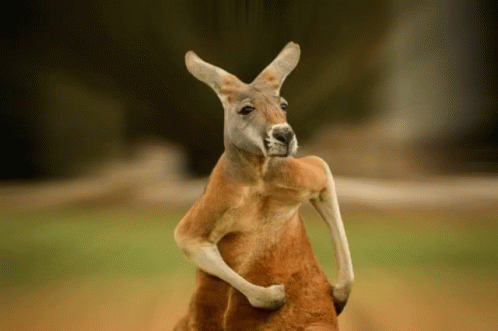

In [18]:
#From the Season2023RaceResults we fetch the top 10 in Australian Grand Prix
Season2023RaceResults[Season2023RaceResults['Track'] == 'Australia'].drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1          1   Max Verstappen    Red Bull Racing Honda RBPT              1   
2         44   Lewis Hamilton                      Mercedes              3   
3         14  Fernando Alonso  Aston Martin Aramco Mercedes              4   
4         18     Lance Stroll  Aston Martin Aramco Mercedes              6   
5         11     Sergio Perez    Red Bull Racing Honda RBPT             20   
6          4     Lando Norris              McLaren Mercedes             13   
7         27  Nico Hulkenberg                  Haas Ferrari             10   
8         81    Oscar Piastri              McLaren Mercedes             16   
9         24      Guanyu Zhou            Alfa Romeo Ferrari             17   
10        22     Yuki Tsunoda         AlphaTauri Honda RBPT             12   

          Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Position                                                              
1           58  2:32:28.371      25              No         1:20.342  
2           58       +0.179      18              No         1:20.613  
3           58       +0.769      15              No         1:20.476  
4           58       +3.082      12              No         1:20.934  
5           58       +3.320      11             Yes         1:20.235  
6           58       +3.701       8              No         1:21.173  
7           58       +4.939       6              No         1:21.124  
8           58       +5.382       4              No         1:21.335  
9           58       +5.713       2              No         1:21.819  
10          58       +6.052       1              No         1:21.789

* The **Australian GP** was chaotic, featuring **three red flags** and **multiple restarts**. The race ended with a controversial final restart, where    several cars crashed, and the race concluded under the safety car. **Max Verstappen** won his second grand prix of the year but an overrall third win   for **RedBull** who were now top of the table for the constructors win.
* **Lewis Hamilton** came  in second and **Fernando Alonso** third.
* The event set at the time a **new attendance record at the circuit for the weekend with 444,631 spectators**, making it the most attended sporting      event ever in Melbourne.
* It was the highest number since the 440,000 attendance recorded at the 2022 United States Grand Prix.
* The Grand Prix broke the record for most red flags, with three.
* The race left many drivers and fans frustrated by the confusion and the decisions made by the race stewards.
* The restart chaos that led to several crashes, including those involving **Fernando Alonso** and **Carlos Sainz**, made this race a significant         talking point of the season
  https://www.youtube.com/watch?v=FExS3lFEwqc

## The Monaco Grand Prix

In [21]:
#From the Season2023RaceResults we fetch the top 10 in Monaco Grand Prix
Season2023RaceResults[Season2023RaceResults['Track'] == 'Monaco'].drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1          1   Max Verstappen    Red Bull Racing Honda RBPT              1   
2         14  Fernando Alonso  Aston Martin Aramco Mercedes              2   
3         31     Esteban Ocon                Alpine Renault              3   
4         44   Lewis Hamilton                      Mercedes              5   
5         63   George Russell                      Mercedes              8   
6         16  Charles Leclerc                       Ferrari              6   
7         10     Pierre Gasly                Alpine Renault              7   
8         55     Carlos Sainz                       Ferrari              4   
9          4     Lando Norris              McLaren Mercedes             10   
10        81    Oscar Piastri              McLaren Mercedes             11   

          Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Position                                                              
1           78  1:48:51.980      25              No         1:16.604  
2           78      +27.921      18              No         1:16.674  
3           78      +36.990      15              No         1:16.528  
4           78      +39.062      13             Yes         1:15.650  
5           78      +56.284      10              No         1:16.798  
6           78      +61.890       8              No         1:15.773  
7           78      +62.362       6              No         1:15.831  
8           78      +63.391       4              No         1:16.449  
9           77       +1 lap       2              No         1:17.844  
10          77       +1 lap       1              No         1:17.513

* The **Monaco GP** is always special due to its history and the challenge it presents to drivers. The race, which was affected by rain during the        middle stages, was won by polesitter **Max Verstappen**, ahead of **Fernando Alonso** and **Esteban Ocon**, the latter receiving his third podium in    his Formula One career after the 2021 Hungarian Grand Prix.
* Tyre supplier Pirelli brought the C3, C4, and C5 tyre compounds (designated hard, medium, and soft, respectively) for teams to use at the event.
* The strategic decisions made during the rain period, especially from Red Bull, were crucial to maintaining track position in the challenging            conditions.
* It was the sixth round of the 2023 Formula One World Championship, after the previously scheduled Emilia Romagna Grand Prix was cancelled due to        floods in the region.* 
Due to this, Mercedes, a team with pending upgrades intended to be introduced during the Imola race, had to implement them during the Monaco rac] Th  e team's car, which utilised the "zero-pod" design that was introduced in the previous year's car, brought an upgrade that reintroduced th              e sidepo. ] In addition, the Alfa Romeo, Aston Martin and Alpine teams sported upgrade packages for the weekend
https://www.youtube.com/watch?v=JyBq7XYDiBg.

## British Grand Prix (Silverstone)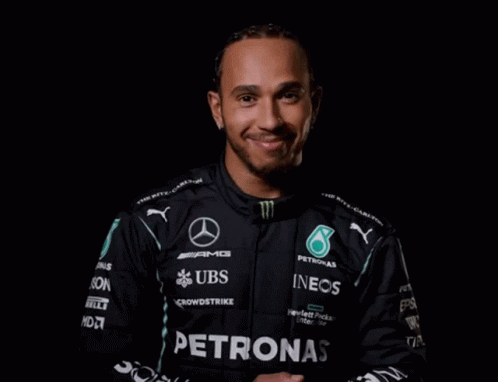

In [24]:
#From the Season2023RaceResults we fetch the top 10 in British Grand Prix
Season2023RaceResults[Season2023RaceResults['Track'] == 'Great Britain'].drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1          1   Max Verstappen    Red Bull Racing Honda RBPT              1   
2          4     Lando Norris              McLaren Mercedes              2   
3         44   Lewis Hamilton                      Mercedes              7   
4         81    Oscar Piastri              McLaren Mercedes              3   
5         63   George Russell                      Mercedes              6   
6         11     Sergio Perez    Red Bull Racing Honda RBPT             15   
7         14  Fernando Alonso  Aston Martin Aramco Mercedes              9   
8         23  Alexander Albon             Williams Mercedes              8   
9         16  Charles Leclerc                       Ferrari              4   
10        55     Carlos Sainz                       Ferrari              5   

          Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Position                                                              
1           52  1:25:16.938      26             Yes         1:30.275  
2           52       +3.798      18              No         1:30.543  
3           52       +6.783      15              No         1:30.545  
4           52       +7.776      12              No         1:30.850  
5           52      +11.206      10              No         1:31.124  
6           52      +12.882       8              No         1:30.914  
7           52      +17.193       6              No         1:31.338  
8           52      +17.878       4              No         1:31.273  
9           52      +18.689       2              No         1:31.255  
10          52      +19.448       1              No         1:31.366

* **Formula 1 Aramco British Grand Prix 2023** was held on 9 July 2023 at the Silverstone Circuit in Northamptonshire, England. It was the tenth round    of the 2023 Formula One World Championship.
* The race, which saw a record 480,000 people attend throughout the weekend, was won by polesitter **Max Verstappen** ahead of the McLaren of **Lando     Norris** and **Mercedes's Lewis Hamilton**.
* This race also marked the last Grand Prix start to date of Dutch driver **Nyck de Vries** who was replaced at **Scuderia AlphaTauri** by **Daniel       Ricciardo** from the next race at the Hungarian Grand Prix onwards.
* The race was marked by strategic tire choices and intense wheel-to-wheel racing.
* A late-race safety car bunched up the field, leading to a thrilling shootout to the finish between Norris, Hamilton, and Verstappen.
* https://www.youtube.com/watch?v=NxQT7GIkPLI

## Dutch Grand Prix (Zandvoort) 

In [27]:
#From the Season2023RaceResults we fetch the top 10 in Dutch Grand Prix
Season2023RaceResults[Season2023RaceResults['Track'] == 'Netherlands'].drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1          1   Max Verstappen    Red Bull Racing Honda RBPT              1   
2         14  Fernando Alonso  Aston Martin Aramco Mercedes              5   
3         10     Pierre Gasly                Alpine Renault             12   
4         11     Sergio Perez    Red Bull Racing Honda RBPT              7   
5         55     Carlos Sainz                       Ferrari              6   
6         44   Lewis Hamilton                      Mercedes             13   
7          4     Lando Norris              McLaren Mercedes              2   
8         23  Alexander Albon             Williams Mercedes              4   
9         81    Oscar Piastri              McLaren Mercedes              8   
10        31     Esteban Ocon                Alpine Renault             16   

          Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Position                                                              
1           72  2:24:04.411      25              No         1:13.889  
2           72       +3.744      19             Yes         1:13.837  
3           72       +7.058      15              No         1:14.441  
4           72      +10.068      12              No         1:14.231  
5           72      +12.541      10              No         1:14.934  
6           72      +13.209       8              No         1:13.904  
7           72      +13.232       6              No         1:14.390  
8           72      +15.155       4              No         1:14.468  
9           72      +16.580       2              No         1:14.299  
10          72      +18.346       1              No         1:14.570

* **Formula 1 Heineken Dutch Grand Prix 2023** was held on 27 August 2023 at the Circuit Zandvoort in Zandvoort, the Netherlands. It was the thirteenth   round of the 2023 Formula One World Championship.
* The race, largely affected by wet weather conditions, was won by **Red Bull Racing** driver **Max Verstappen**, who started from pole                   position,thrilled his home fans by taking the win in a race that saw multiple safety cars and chaotic pit stops.
* Verstappen's victory was his **ninth in a row**, equaling Sebastian Vettel's record.
* **Fernando Alonso of Aston Martin** and **Pierre Gasly of Alpine, Gasly's first podium of the season** came in second and third respectively.
* The race featured the Grand Prix debut of **Liam Lawson**, substituting for **AlphaTauri** driver **Daniel Ricciardo** when the latter broke a          metacarpal bone during a practice session.
* The rain at the start and midway through the race caused several incidents and off-track excursions, making it a challenging race for all drivers​.
* https://www.youtube.com/watch?v=Ao7X7BS_vIs

## Brazil Grand Prix (São Paulo) 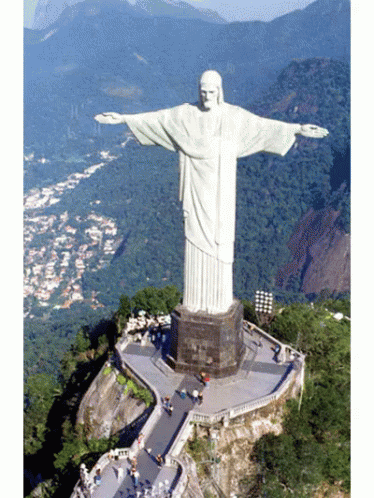

In [30]:
#From the Season2023RaceResults we fetch the top 10 in Brazil Grand Prix
Season2023RaceResults[Season2023RaceResults['Track'] == 'Brazil'].drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1          1   Max Verstappen    Red Bull Racing Honda RBPT              1   
2          4     Lando Norris              McLaren Mercedes              6   
3         14  Fernando Alonso  Aston Martin Aramco Mercedes              4   
4         11     Sergio Perez    Red Bull Racing Honda RBPT              9   
5         18     Lance Stroll  Aston Martin Aramco Mercedes              3   
6         55     Carlos Sainz                       Ferrari              7   
7         10     Pierre Gasly                Alpine Renault             15   
8         44   Lewis Hamilton                      Mercedes              5   
9         22     Yuki Tsunoda         AlphaTauri Honda RBPT             16   
10        31     Esteban Ocon                Alpine Renault             14   

          Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Position                                                              
1           71  1:56:48.894      25              No         1:13.422  
2           71       +8.227      19             Yes         1:12.486  
3           71      +34.155      15              No         1:14.442  
4           71      +34.208      12              No         1:14.124  
5           71      +40.845      10              No         1:14.007  
6           71      +50.188       8              No         1:14.406  
7           71      +56.093       6              No         1:14.521  
8           71      +62.859       4              No         1:14.739  
9           71      +69.880       2              No         1:14.231  
10          70       +1 lap       1              No         1:14.206

* The 2023 São Paulo Grand Prix (officially known as the **Formula 1 Rolex Grande Prêmio de São Paulo 2023**) was held on 5 November 2023 at the          **Interlagos Circuit** in **São Paulo, Brazil**. It was the twentieth round of the 2023 Formula One World Championship and the sixth and final Grand    Prix weekend of the season to utilise the Formula One sprint format.
* **Max Verstappen** took pole position for the main race during a weather-affected qualifying, while **Lando Norris** took the sprint pole position.
* Both the sprint and main race were won by Verstappen, setting a new Formula One record for highest percentage of wins in a single season.
* It was **Red Bull Racing's 19th win** of the season, matching **Mercedes's 2016 season win record**.
* Norris finished the race in **second place, his 13th career podium, tying Nick Heidfeld for most podiums without a race win**.
* **Fernando Alonso** finished third, after overtaking **Sergio Pérez on the final lap and beat him by 0.053 seconds**. This was his ninth podium at     **Interlagos** without ever winning and his first since the **2013 Brazilian Grand Prix.
* https://www.youtube.com/watch?v=WkLTWmlTaJM

## 2023 Season - Sprint Races

Sprint races were the new additions of F1 race weekend structure, first introduced in 2021 Season. In such weekends where this kind of race is available, qualifying session is carried out **on Friday** to determine the starting grid of the sprint race that is implemented **on Saturday** and also the award for pole position.

Note that the distances of sprint races are roughly **one third** of a Sunday's race session (in other words, a little more than **100 km**) and it's not mandatory to pit in for changing tyres for another compound. The main purpose of these races are to **shuffle the grid** a bit more by racing on the track to prepare all drivers and teams for the real Grand Prix race on Sunday. Moreover, the top 8 drivers can earn additional championship points, where **the winner of the sprint race gets 8 points**, going down one by one to **1 point for the driver finishing eighth**.

Below you can see the top 10 results of all sprint races occurred in 2023. Total of three sprint races have been organized in **Azerbaijan**, **Austria**, **Belgium**,**Qatar**, **United States** and **Brazil**, respectively:

## 1) Azerbaijan 

In [35]:
#From the Season2023SprintRaceResults we fetch the Season2023SprintRaceResults in Azerbaijan
Season2023SprintRaceResults[Season2023SprintRaceResults['Track'] == 'Azerbaijan'] \
    .drop('Track', axis=1).set_index('Position').head(20)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1         11     Sergio Perez    Red Bull Racing Honda RBPT              2   
2         16  Charles Leclerc                       Ferrari              1   
3          1   Max Verstappen    Red Bull Racing Honda RBPT              3   
4         63   George Russell                      Mercedes              4   
5         55     Carlos Sainz                       Ferrari              5   
6         14  Fernando Alonso  Aston Martin Aramco Mercedes              8   
7         44   Lewis Hamilton                      Mercedes              6   
8         18     Lance Stroll  Aston Martin Aramco Mercedes              9   
9         23  Alexander Albon             Williams Mercedes              7   
10        81    Oscar Piastri              McLaren Mercedes             11   
11        20  Kevin Magnussen                  Haas Ferrari             13   
12        24      Guanyu Zhou            Alfa Romeo Ferrari             14   
13        10     Pierre Gasly                Alpine Renault             17   
14        21    Nyck De Vries         AlphaTauri Honda RBPT             18   
15        27  Nico Hulkenberg                  Haas Ferrari             12   
16        77  Valtteri Bottas            Alfa Romeo Ferrari             15   
17         4     Lando Norris              McLaren Mercedes             10   
18        31     Esteban Ocon                Alpine Renault             19   
NC        22     Yuki Tsunoda         AlphaTauri Honda RBPT             16   

          Laps Time/Retired  Points  
Position                             
1           17    33:17.667       8  
2           17       +4.463       7  
3           17       +5.065       6  
4           17       +8.532       5  
5           17      +10.388       4  
6           17      +11.613       3  
7           17      +16.503       2  
8           17      +18.417       1  
9           17      +21.757       0  
10          17      +22.851       0  
11          17      +27.990       0  
12          17      +34.602       0  
13          17      +36.918       0  
14          17      +41.626       0  
15          17      +48.587       0  
16          17      +49.917       0  
17          17      +51.104       0  
18          17      +60.621       0  
NC           2          DNF       0

* The Azerbaijan Sprint race in 2023, held at the Baku City Circuit, was an intense event. Sergio Pérez of Red Bull claimed victory, showcasing strong pace throughout the race.
*  Charles Leclerc, who started from pole, finished second after struggling to keep up with Pérez's speed.
*  Max Verstappen finished third after a dramatic clash with George Russell on the first lap, which caused minor damage to his car.
*  The event also saw competitive midfield battles, making it an exciting precursor to the main race.
* https://www.youtube.com/watch?v=x0ViX9RpVJo

## 2) Austria

In [38]:
#From the Season2023SprintRaceResults we fetch the Season2023SprintRaceResults in Australia
Season2023SprintRaceResults[Season2023SprintRaceResults['Track'] == 'Austria'] \
    .drop('Track', axis=1).set_index('Position').head(20)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1          1   Max Verstappen    Red Bull Racing Honda RBPT              1   
2         11     Sergio Perez    Red Bull Racing Honda RBPT              2   
3         55     Carlos Sainz                       Ferrari              5   
4         18     Lance Stroll  Aston Martin Aramco Mercedes              7   
5         14  Fernando Alonso  Aston Martin Aramco Mercedes              6   
6         27  Nico Hulkenberg                  Haas Ferrari              4   
7         31     Esteban Ocon                Alpine Renault              8   
8         63   George Russell                      Mercedes             15   
9          4     Lando Norris              McLaren Mercedes              3   
10        44   Lewis Hamilton                      Mercedes             18   
11        81    Oscar Piastri              McLaren Mercedes             17   
12        16  Charles Leclerc                       Ferrari              9   
13        23  Alexander Albon             Williams Mercedes             11   
14        20  Kevin Magnussen                  Haas Ferrari             10   
15        10     Pierre Gasly                Alpine Renault             12   
16        22     Yuki Tsunoda         AlphaTauri Honda RBPT             13   
17        21    Nyck De Vries         AlphaTauri Honda RBPT             14   
18         2   Logan Sargeant             Williams Mercedes             20   
19        24      Guanyu Zhou            Alfa Romeo Ferrari             16   
20        77  Valtteri Bottas            Alfa Romeo Ferrari             19   

          Laps Time/Retired  Points  
Position                             
1           24    30:26.730       8  
2           24      +21.048       7  
3           24      +23.088       6  
4           24      +29.703       5  
5           24      +30.109       4  
6           24      +31.297       3  
7           24      +36.602       2  
8           24      +36.611       1  
9           24      +38.608       0  
10          24      +46.375       0  
11          24      +49.807       0  
12          24      +50.789       0  
13          24      +52.848       0  
14          24      +56.593       0  
15          24      +57.652       0  
16          24      +64.822       0  
17          24      +65.617       0  
18          24      +66.059       0  
19          24      +70.825       0  
20          24      +76.435       0

* The 2023 Austrian Sprint at the Red Bull Ring was an intense, rain-soaked affair, with plenty of action and overtakes.
*  Max Verstappen, starting from pole, dominated the race, maintaining control despite wet conditions.
*   Behind him, Sergio Pérez fought through the field after a poor start, securing a strong finish.
*   Carlos Sainz and Nico Hülkenberg had impressive performances but faced stiff competition from Lewis Hamilton and Fernando Alonso.
*   Rain added unpredictability, and tire strategy played a key role, making it a thrilling sprint showdown!
*   https://www.youtube.com/watch?v=1WK8ssBwQ3I

## 3) Belgium

In [41]:
#From the Season2023SprintRaceResults we fetch the Season2023SprintRaceResults in Belgium
Season2023SprintRaceResults[Season2023SprintRaceResults['Track'] == 'Belgium'] \
    .drop('Track', axis=1).set_index('Position').head(20)

No            Driver                          Team  Starting Grid  \
Position                                                                      
1          1    Max Verstappen    Red Bull Racing Honda RBPT              1   
2         81     Oscar Piastri              McLaren Mercedes              2   
3         10      Pierre Gasly                Alpine Renault              6   
4         55      Carlos Sainz                       Ferrari              3   
5         16   Charles Leclerc                       Ferrari              4   
6          4      Lando Norris              McLaren Mercedes              5   
7         44    Lewis Hamilton                      Mercedes              7   
8         63    George Russell                      Mercedes             10   
9         31      Esteban Ocon                Alpine Renault              9   
10         3  Daniel Ricciardo         AlphaTauri Honda RBPT             11   
11        18      Lance Stroll  Aston Martin Aramco Mercedes             14   
12        23   Alexander Albon             Williams Mercedes             12   
13        77   Valtteri Bottas            Alfa Romeo Ferrari             17   
14        20   Kevin Magnussen                  Haas Ferrari             18   
15        24       Guanyu Zhou            Alfa Romeo Ferrari             19   
16         2    Logan Sargeant             Williams Mercedes             13   
17        27   Nico Hulkenberg                  Haas Ferrari             20   
18        22      Yuki Tsunoda         AlphaTauri Honda RBPT             16   
NC        11      Sergio Perez    Red Bull Racing Honda RBPT              8   
NC        14   Fernando Alonso  Aston Martin Aramco Mercedes             15   

          Laps Time/Retired  Points  
Position                             
1           11    24:58.433       8  
2           11       +6.677       7  
3           11      +10.733       6  
4           11      +12.648       5  
5           11      +15.016       4  
6           11      +16.052       3  
7           11      +16.757       2  
8           11      +16.822       1  
9           11      +22.410       0  
10          11      +22.806       0  
11          11      +25.007       0  
12          11      +26.303       0  
13          11      +27.006       0  
14          11      +32.986       0  
15          11      +36.342       0  
16          11      +37.571       0  
17          11      +37.827       0  
18          11      +39.267       0  
NC           8          DNF       0  
NC           2          DNF       0

* The 2023 Belgium Sprint race, held at Spa-Francorchamps, took place under wet conditions.
* Max Verstappen claimed victory in a challenging race, further solidifying his dominance in the season.
* Despite starting in pole position, Verstappen briefly lost the lead to Oscar Piastri, who showcased impressive performance. However, Verstappen     regained control after a pit stop under drying track conditions.
* Piastri finished second, marking a standout result for McLaren.
* Pierre Gasly also had a strong race, securing third place for Alpine. The sprint format continued to offer dynamic, fast-paced racing.
* https://www.youtube.com/watch?v=2ZfqIfSdeK0

## 4) Qatar

In [44]:
#From the Season2023SprintRaceResults we fetch the Season2023SprintRaceResults in Qatar
Season2023SprintRaceResults[Season2023SprintRaceResults['Track'] == 'Qatar'] \
  .drop('Track', axis=1).set_index('Position').head(20)

No           Driver                          Team  Starting Grid  \
Position                                                                     
1         81    Oscar Piastri              McLaren Mercedes              1   
2          1   Max Verstappen    Red Bull Racing Honda RBPT              3   
3          4     Lando Norris              McLaren Mercedes              2   
4         63   George Russell                      Mercedes              4   
5         44   Lewis Hamilton                      Mercedes             12   
6         55     Carlos Sainz                       Ferrari              5   
7         23  Alexander Albon             Williams Mercedes             17   
8         14  Fernando Alonso  Aston Martin Aramco Mercedes              9   
9         10     Pierre Gasly                Alpine Renault             11   
10        77  Valtteri Bottas            Alfa Romeo Ferrari             13   
11        22     Yuki Tsunoda         AlphaTauri Honda RBPT             18   
12        16  Charles Leclerc                       Ferrari              6   
13        20  Kevin Magnussen                  Haas Ferrari             19   
14        24      Guanyu Zhou            Alfa Romeo Ferrari             15   
15        18     Lance Stroll  Aston Martib Aramco Mercedes             16   
NC        27  Nico Hulkenberg                  Haas Ferrari              7   
NC        31     Esteban Ocon                Alpine Renault             10   
NC        11     Sergio Perez    Red Bull Racing Honda RBPT              8   
NC         2   Logan Sargeant             Williams Mercedes             20   
NC        40      Liam Lawson         AlphaTauri Honda RBPT             14   

          Laps Time/Retired  Points  
Position                             
1           19    35:01.297       8  
2           19       +1.871       7  
3           19       +8.497       6  
4           19      +11.036       5  
5           19      +17.314       4  
6           19      +18.806       3  
7           19      +19.864       2  
8           19      +21.180       1  
9           19      +21.742       0  
10          19      +22.208       0  
11          19      +22.863       0  
12          19      +24.860       0  
13          19      +24.970       0  
14          19      +26.868       0  
15          19      +29.523       0  
NC          11          DNF       0  
NC          10          DNF       0  
NC          10          DNF       0  
NC           2          DNF       0  
NC           0          DNF       0

* Max Verstappen clinched his third World Championship after securing 2nd place in the sprint race.
* **Oscar Piastri (McLaren) won his first Formula 1 race, leading the sprint from start to finish.**
* Lando Norris finished third, making it a successful day for McLaren with two podiums.
* The sprint featured intense wheel-to-wheel racing, particularly between Verstappen, Norris, and Piastri.
* https://www.youtube.com/watch?v=Z_xBjJvYYr4

## 5) United States

In [47]:
#From the Season2023SprintRaceResults we fetch the Season2023SprintRaceResults in United States
Season2023SprintRaceResults[Season2023SprintRaceResults['Track'] == 'United States'] \
    .drop('Track', axis=1).set_index('Position').head(20)

No            Driver                          Team  Starting Grid  \
Position                                                                      
1          1    Max Verstappen    Red Bull Racing Honda RBPT              1   
2         44    Lewis Hamilton                      Mercedes              3   
3         16   Charles Leclerc                       Ferrari              2   
4          4      Lando Norris              McLaren Mercedes              4   
5         11      Sergio Perez    Red Bull Racing Honda RBPT              7   
6         55      Carlos Sainz                       Ferrari              6   
7         10      Pierre Gasly                Alpine Renault              9   
8         63    George Russell                      Mercedes             11   
9         23   Alexander Albon             Williams Mercedes              8   
10        81     Oscar Piastri              McLaren Mercedes              5   
11        31      Esteban Ocon                Alpine Renault             13   
12         3  Daniel Ricciardo         AlphaTauri Honda RBPT             10   
13        14   Fernando Alonso  Aston Martin Aramco Mercedes             12   
14        22      Yuki Tsunoda         AlphaTauri Honda RBPT             19   
15        27   Nico Hulkenberg                  Haas Ferrari             16   
16        77   Valtteri Bottas            Alfa Romeo Ferrari             18   
17        24       Guanyu Zhou            Alfa Romeo Ferrari             15   
18        20   Kevin Magnussen                  Haas Ferrari             17   
19         2    Logan Sargeant             Williams Mercedes             20   
NC        18      Lance Stroll  Aston Martin Aramco Mercedes             14   

          Laps Time/Retired  Points  
Position                             
1           19    31:30.849       8  
2           19       +9.465       7  
3           19      +17.987       6  
4           19      +18.863       5  
5           19      +22.928       4  
6           19      +28.307       3  
7           19      +32.403       2  
8           19      +34.250       1  
9           19      +34.567       0  
10          19      +42.403       0  
11          19      +44.986       0  
12          19      +45.509       0  
13          19      +49.086       0  
14          19      +49.733       0  
15          19      +56.650       0  
16          19      +64.401       0  
17          19      +67.972       0  
18          19      +71.122       0  
19          19      +71.449       0  
NC          16          DNF       0

* Max Verstappen Victory: Verstappen won the 2023 US Sprint race, continuing his dominance after securing the world championship in Qatar.
* Close Battle for Second: Lewis Hamilton and Charles Leclerc fought for second place, with Hamilton showcasing strong pace.
* Perez Struggles: Sergio Perez had a less competitive race, finishing off the podium, raising questions about his performance.
* Track Evolution: Tire degradation and track conditions played significant roles in the race strategy.
* Ferrari’s Pace: Charles Leclerc and Ferrari showed strong form, keeping close to Mercedes.
* McLaren’s Consistency: McLaren continued their strong 2023 form with both drivers securing top finishes.
* Weather Challenges: Windy conditions affected car stability, making handling trickier for the drivers.
* https://www.youtube.com/watch?v=ig4laP4FShE

## 6) Brazil

In [50]:
#From the Season2023SprintRaceResults we fetch the Season2023SprintRaceResults in Brazil
Season2023SprintRaceResults[Season2023SprintRaceResults['Track'] == 'Brazil'] \
    .drop('Track', axis=1).set_index('Position').head(20)

No            Driver                          Team  Starting Grid  \
Position                                                                      
1          1    Max Verstappen    Red Bull Racing Honda RBPT              2   
2          4      Lando Norris              McLaren Mercedes              1   
3         11      Sergio Perez    Red Bull Racing Honda RBPT              3   
4         63    George Russell                      Mercedes              4   
5         16   Charles Leclerc                       Ferrari              7   
6         22      Yuki Tsunoda         AlphaTauri Honda RBPT              6   
7         44    Lewis Hamilton                      Mercedes              5   
8         55      Carlos Sainz                       Ferrari              9   
9          3  Daniel Ricciardo         AlphaTauri Honda RBPT              8   
10        81     Oscar Piastri              McLaren Mercedes             10   
11        14   Fernando Alonso  Aston Martin Aramco Mercedes             15   
12        18      Lance Stroll  Aston Martin Aramco Mercedes             17   
13        10      Pierre Gasly                Alpine Renault             13   
14        31      Esteban Ocon                Alpine Renault             16   
15        23   Alexander Albon             Williams Mercedes             19   
16        20   Kevin Magnussen                  Haas Ferrari             11   
17        24       Guanyu Zhou            Alfa Romeo Ferrari             18   
18        27   Nico Hulkenberg                  Haas Ferrari             12   
19        77   Valtteri Bottas            Alfa Romeo Ferrari             14   
20         2    Logan Sargeant             Williams Mercedes             20   

          Laps Time/Retired  Points  
Position                             
1           24    30:07.209       8  
2           24       +4.287       7  
3           24      +13.617       6  
4           24      +25.879       5  
5           24      +28.560       4  
6           24      +29.210       3  
7           24      +34.726       2  
8           24      +35.106       1  
9           24      +35.303       0  
10          24      +38.219       0  
11          24      +39.061       0  
12          24      +39.478       0  
13          24      +40.621       0  
14          24      +42.848       0  
15          24      +43.394       0  
16          24      +56.507       0  
17          24      +58.723       0  
18          24      +60.330       0  
19          24      +60.749       0  
20          24      +60.945       0

* Dominant Performance by Max Verstappen: Verstappen showcased his brilliance by winning the sprint race, securing his record-breaking 17th win of the season.
* Tough Conditions: The sprint took place under tricky, wet conditions, making tire strategy and car handling crucial.
* Overtaking Battles: The race saw several exciting overtakes, especially in the mid-pack, highlighting the close competition.
* Lando Norris’ Fight: Norris put up a strong challenge, keeping the pressure on Verstappen throughout the race.
* Impressive Alonso: Fernando Alonso delivered a standout performance, gaining crucial positions with smart tire management.
* Leclerc’s Frustration: Ferrari’s Charles Leclerc expressed frustration after a tough sprint, struggling to find the right pace.
* Midfield Shake-Up: The unpredictable nature of the sprint led to unexpected shake-ups in the midfield, affecting starting positions for the main race.
* https://www.youtube.com/watch?v=3O9HOA8ZpyA

## Conclusion
* The 2023 Formula 1 season featured six sprint races, which doubled the number from previous years.
* These sprint races took place at the following circuits: **Baku City Circuit in Azerbaijan, Red Bull Ring in Austria, Circuit de Spa-Francorchamps in   Belgium, Lusail International Circuit in Qatar, Circuit of The Americas in the USA, and Interlagos in Brazil**.
* **Max Verstappen** dominated the sprint races, winning **four out of the six** events. His victories further solidified his position as the world       champion, with other wins coming from **Sergio Perez and Oscar Piastri**.
* The sprint races had a significant impact on the championship standings, especially for drivers like **Lando Norris and Carlos Sainz**, who showed      strong   performances.
* The sprint race format in 2023 included a dedicated qualifying session called the **Sprint Shootout,** which determined the grid for the sprint race    itself, separate from the traditional Grand Prix qualifying. This format allowed drivers to compete for points in these shorter races, with the         winner earning eight points.

## 2023 Season - Sprint Shootout Results

## 1) Azerbaijan

In [55]:
#From the Season2023SprintShootoutResults we fetch the top 10 drivers in Season2023SprintShootoutResults in Azerbaijan
Season2023SprintShootoutResults[Season2023SprintShootoutResults['Track'] == 'Azerbaijan'] \
    .drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team       SQ1  \
Position                                                                
1         16  Charles Leclerc                       Ferrari  1:42.820   
2         11     Sergio Perez    Red Bull Racing Honda RBPT  1:43.858   
3          1   Max Verstappen    Red Bull Racing Honda RBPT  1:43.288   
4         63   George Russell                      Mercedes  1:43.763   
5         55     Carlos Sainz                       Ferrari  1:43.622   
6         44   Lewis Hamilton                      Mercedes  1:43.561   
7         23  Alexander Albon             Williams Mercedes  1:43.987   
8         14  Fernando Alonso  Aston Martin Aramco Mercedes  1:43.789   
9         18     Lance Stroll  Aston Martin Aramco Mercedes  1:43.879   
10         4     Lando Norris              McLaren Mercedes  1:43.938   

               SQ2       SQ3  Laps  
Position                            
1         1:42.500  1:41.697    14  
2         1:42.925  1:41.844    15  
3         1:42.217  1:41.987    13  
4         1:43.112  1:42.252    18  
5         1:42.909  1:42.287    15  
6         1:43.061  1:42.502    17  
7         1:43.376  1:42.846    17  
8         1:42.976  1:43.010    16  
9         1:43.375  1:43.064    17  
10        1:43.395       NaN    12

## 2) Austria

In [57]:
#From the Season2023SprintShootoutResults we fetch the top 10 drivers in Season2023SprintShootoutResults in Austria
Season2023SprintShootoutResults[Season2023SprintShootoutResults['Track'] == 'Austria'] \
    .drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team       SQ1  \
Position                                                                
1          1   Max Verstappen    Red Bull Racing Honda RBPT  1:06.236   
2         11     Sergio Perez    Red Bull Racing Honda RBPT  1:06.924   
3          4     Lando Norris              McLaren Mercedes  1:06.723   
4         27  Nico Hulkenberg                  Haas Ferrari  1:06.548   
5         55     Carlos Sainz                       Ferrari  1:06.187   
6         16  Charles Leclerc                       Ferrari  1:07.061   
7         14  Fernando Alonso  Aston Martin Aramco Mercedes  1:06.611   
8         18     Lance Stroll  Aston Martin Aramco Mercedes  1:06.569   
9         31     Esteban Ocon                Alpine Renault  1:06.840   
10        20  Kevin Magnussen                  Haas Ferrari  1:06.629   

               SQ2       SQ3  Laps  
Position                            
1         1:05.371  1:04.440    23  
2         1:05.836  1:04.933    23  
3         1:05.699  1:05.010    23  
4         1:06.091  1:05.084    23  
5         1:05.434  1:05.136    18  
6         1:05.673  1:05.245    23  
7         1:05.759  1:05.258    24  
8         1:05.914  1:05.347    24  
9         1:05.604  1:05.366    24  
10        1:05.730  1:05.912    23

## 3) Belgium

In [59]:
#From the Season2023SprintShootoutResults we fetch the top 10 drivers in Season2023SprintShootoutResults in Belgium
Season2023SprintShootoutResults[Season2023SprintShootoutResults['Track'] == 'Belgium'] \
    .drop('Track', axis=1).set_index('Position').head(10)

No           Driver                        Team       SQ1       SQ2  \
Position                                                                        
1          1   Max Verstappen  Red Bull Racing Honda RBPT  1:58.135  1:55.200   
2         81    Oscar Piastri            McLaren Mercedes  2:00.056  1:56.392   
3         55     Carlos Sainz                     Ferrari  1:59.414  1:56.557   
4         16  Charles Leclerc                     Ferrari  1:59.575  1:56.265   
5          4     Lando Norris            McLaren Mercedes  2:00.436  1:56.828   
6         10     Pierre Gasly              Alpine Renault  2:00.032  1:56.137   
7         44   Lewis Hamilton                    Mercedes  1:58.939  1:55.823   
8         11     Sergio Perez  Red Bull Racing Honda RBPT  1:59.362  1:55.878   
9         31     Esteban Ocon              Alpine Renault  1:59.884  1:57.051   
10        63   George Russell                    Mercedes  2:00.475  1:57.393   

               SQ3  Laps  
Position                  
1         1:49.056    14  
2         1:49.067    14  
3         1:49.081    14  
4         1:49.251    14  
5         1:49.389    16  
6         1:49.700    15  
7         1:49.900    16  
8         1:49.961    14  
9         1:50.494    15  
10        1:55.742    13

## 3) Qatar

In [61]:
#From the Season2023SprintShootoutResults we fetch the top 10 drivers in Season2023SprintShootoutResults in Qatar
Season2023SprintShootoutResults[Season2023SprintShootoutResults['Track'] == 'Qatar'] \
    .drop('Track', axis=1).set_index('Position').head(10)

No           Driver                          Team       SQ1  \
Position                                                                
1         81    Oscar Piastri              McLaren Mercedes  1:25.979   
2          4     Lando Norris              McLaren Mercedes  1:25.672   
3          1   Max Verstappen    Red Bull Racing Honda RBPT  1:25.510   
4         63   George Russell                      Mercedes  1:25.413   
5         55     Carlos Sainz                       Ferrari  1:25.872   
6         16  Charles Leclerc                       Ferrari  1:26.266   
7         27  Nico Hulkenberg                  Haas Ferrari  1:26.450   
8         11     Sergio Perez    Red Bull Racing Honda RBPT  1:26.123   
9         14  Fernando Alonso  Aston Martin Aramco Mercedes  1:25.936   
10        31     Esteban Ocon                Alpine Renault  1:26.072   

               SQ2       SQ3  Laps  
Position                            
1         1:25.496  1:24.454    18  
2         1:24.947  1:24.536    14  
3         1:25.199  1:24.646    12  
4         1:25.027  1:24.841    17  
5         1:25.433  1:25.155    21  
6         1:25.367  1:25.247    21  
7         1:25.499  1:25.320    16  
8         1:25.143  1:25.382    17  
9         1:25.344       DNF    13  
10        1:25.510       DNF    15

## 4) United States

In [63]:
#From the Season2023SprintShootoutResults we fetch the top 10 drivers in Season2023SprintShootoutResults in United States
Season2023SprintShootoutResults[Season2023SprintShootoutResults['Track'] == 'United States'] \
    .drop('Track', axis=1).set_index('Position').head(10)

No           Driver                        Team       SQ1       SQ2  \
Position                                                                        
1          1   Max Verstappen  Red Bull Racing Honda RBPT  1:35.997  1:35.181   
2         16  Charles Leclerc                     Ferrari  1:35.999  1:35.386   
3         44   Lewis Hamilton                    Mercedes  1:36.393  1:35.887   
4          4     Lando Norris            McLaren Mercedes  1:36.499  1:35.594   
5         81    Oscar Piastri            McLaren Mercedes  1:36.703  1:35.753   
6         55     Carlos Sainz                     Ferrari  1:36.268  1:35.542   
7         11     Sergio Perez  Red Bull Racing Honda RBPT  1:36.347  1:35.718   
8         63   George Russell                    Mercedes  1:36.281  1:35.847   
9         23  Alexander Albon           Williams Mercedes  1:36.230  1:35.947   
10        10     Pierre Gasly              Alpine Renault  1:36.595  1:35.785   

               SQ3  Laps  
Position                  
1         1:34.538    11  
2         1:34.593    14  
3         1:34.607    12  
4         1:34.639    15  
5         1:34.894    15  
6         1:34.939    14  
7          1:35041    14  
8         1:35.199    12  
9         1:35.366    12  
10        1:35.897    12

## 5) Brazil

In [65]:
#From the Season2023SprintShootoutResults we fetch the top 10 drivers in Season2023SprintShootoutResults in Brazil
Season2023SprintShootoutResults[Season2023SprintShootoutResults['Track'] == 'Brazil'] \
    .drop('Track', axis=1).set_index('Position').head(10)

No            Driver                        Team       SQ1  \
Position                                                               
1          4      Lando Norris            McLaren Mercedes  1:11.824   
2          1    Max Verstappen  Red Bull Racing Honda RBPT  1:11.888   
3         11      Sergio Perez  Red Bull Racing Honda RBPT  1:12.218   
4         63    George Russell                    Mercedes  1:11.976   
5         44    Lewis Hamilton                    Mercedes  1:11.870   
6         22      Yuki Tsunoda       AlphaTauri Honda RBPT  1:12.358   
7         16   Charles Leclerc                     Ferrari  1:12.107   
8          3  Daniel Ricciardo       AlphaTauri Honda RBPT  1:12.175   
9         55      Carlos Sainz                     Ferrari  1:11:796   
10        81     Oscar Piastri            McLaren Mercedes  1:12.356   

               SQ2        SQ3  Laps  
Position                             
1         1:11.221   1:10.622    15  
2         1:11.262   1:10.683    16  
3         1:11.230   1:10.756    16  
4         1:11.516   1:10.857    14  
5         1:11.476   1:10.940    14  
6         1:11.676  1:11.0.19    12  
7         1:11.473   1:11.077    15  
8         1:11.423   1:11.122    11  
9         1:11.491   1:11.126    13  
10        1:11.648   1:11.189    14

* The 2023 F1 Sprint Shootouts, particularly during the **Austrian** and **United States** Grands Prix, provided intense competition and significant      insights into team and driver performances under varying conditions.

* In the **Austrian GP, Max Verstappen** dominated the Sprint Shootout, securing pole position despite challenging **wet-to-dry** track conditions. He    was closely followed by his **Red Bull teammate Sergio Perez and McLaren's Lando Norris**.
* Notably, drivers like Lewis Hamilton and George Russell faced difficulties, with Hamilton being eliminated early in SQ1 and Russell struggling with     mechanical issues in SQ2.

* At the **United States GP**, **Verstappen** again claimed the top spot in the Sprint Shootout, narrowly edging out **Charles Leclerc*8 and **Lewis      Hamilton**. This performance underlined Verstappen's consistent dominance throughout the season, even under pressure from competitors like Norris and   Leclerc.
* These Sprint Shootouts revealed both the strength of **Red Bull's** package and the ability of other teams like **McLaren and Ferrari** to challenge    at the front under specific circumstances.

## Visual Points Progression of Top 10 Drivers Throughout The Season

In [68]:
racePoints = Season2023RaceResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
#Season2023RaceResults is our dataframe. Groupby(['Driver', 'Team']):Groups the race results by both 'Driver'&'Team' to calculate the total_points each driver has earned.
#sum(): Adds up the total points for each driver across all races. sort_values(ascending=False): Sorts the points in descending order

sprintRacePoints = Season2023SprintRaceResults.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
#sprintRacePoints is our dataframe. We do the grouping, sum and sorting same as the case above

for driver in Season2023RaceResults['Driver'].unique():
    if driver not in Season2023SprintRaceResults['Driver'].unique():
        sprintRacePoints.loc[driver] = 0 # driver who participated in the main races didn't participate in sprint races, assign them 0 points in sprintRacePoints.

driverStandings = (racePoints + sprintRacePoints).fillna(0).sort_values(ascending=False) #driver with nan is assigned (O) for sum sorting in desecnding.
driverStandings = pd.DataFrame(driverStandings).reset_index() #Converts the points into a DataFrame and resets the index to start fresh.
driverStandings['POS'] = range(1,23) #Creates a new column position for all 22.
driverStandings['Points'] = driverStandings['Points'].astype(int) #Converts the points to integers to remove any decimal values.
driverStandings.set_index('POS', inplace=True) #set pos at index
driverStandings

Driver                          Team  Points
POS                                                        
1      Max Verstappen    Red Bull Racing Honda RBPT     575
2        Sergio Perez    Red Bull Racing Honda RBPT     285
3      Lewis Hamilton                      Mercedes     234
4     Fernando Alonso  Aston Martin Aramco Mercedes     206
5     Charles Leclerc                       Ferrari     206
6        Lando Norris              McLaren Mercedes     205
7        Carlos Sainz                       Ferrari     200
8      George Russell                      Mercedes     175
9       Oscar Piastri              McLaren Mercedes      97
10       Lance Stroll  Aston Martin Aramco Mercedes      74
11       Pierre Gasly                Alpine Renault      62
12       Esteban Ocon                Alpine Renault      58
13    Alexander Albon             Williams Mercedes      27
14       Yuki Tsunoda         AlphaTauri Honda RBPT      17
15    Valtteri Bottas            Alfa Romeo Ferrari      10
16    Nico Hulkenberg                  Haas Ferrari       9
17        Guanyu Zhou            Alfa Romeo Ferrari       6
18   Daniel Ricciardo         AlphaTauri Honda RBPT       6
19    Kevin Magnussen                  Haas Ferrari       3
20        Liam Lawson         AlphaTauri Honda RBPT       2
21     Logan Sargeant             Williams Mercedes       1
22      Nyck De Vries         AlphaTauri Honda RBPT       0

In [69]:
#Extract the Top 10 Drivers. driverStandingsTop10: Stores these top 10 driver names as a NumPy array.
driverStandingsTop10 = driverStandings['Driver'][:10].values
#Initialize Dictionaries for Storing Points
driverPointsTop10 = {};  driverPointsTop10Sprint = {}
#Populate the Dictionaries with Points Data
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = Season2023RaceResults[Season2023RaceResults['Driver'] == driver]['Points'].values
    driverPointsTop10Sprint[driver] = Season2023SprintRaceResults[Season2023SprintRaceResults['Driver'] == driver] \
        ['Points'].values               #Filter and Assign Points:
#Adjust Points by Combining Race and Sprint Race Points
sp = [3, 10, 20]   #The indices 3, 10, and 20 correspond to particular races in the season.#
for driver in driverStandingsTop10:
    for i in range(len(sp)):
        driverPointsTop10[driver][sp[i]] = driverPointsTop10[driver][sp[i]] + driverPointsTop10Sprint[driver][i]
#For each driver, the code adjusts the points for the specified race events by adding the corresponding sprint race points:
#driverPointsTop10[driver][sp[i]]: Refers to the points at the race indexed by sp[i] for a particular driver.
#driverPointsTop10Sprint[driver][i]: Refers to the points from the sprint race that corresponds to the index i in the sprint race data.

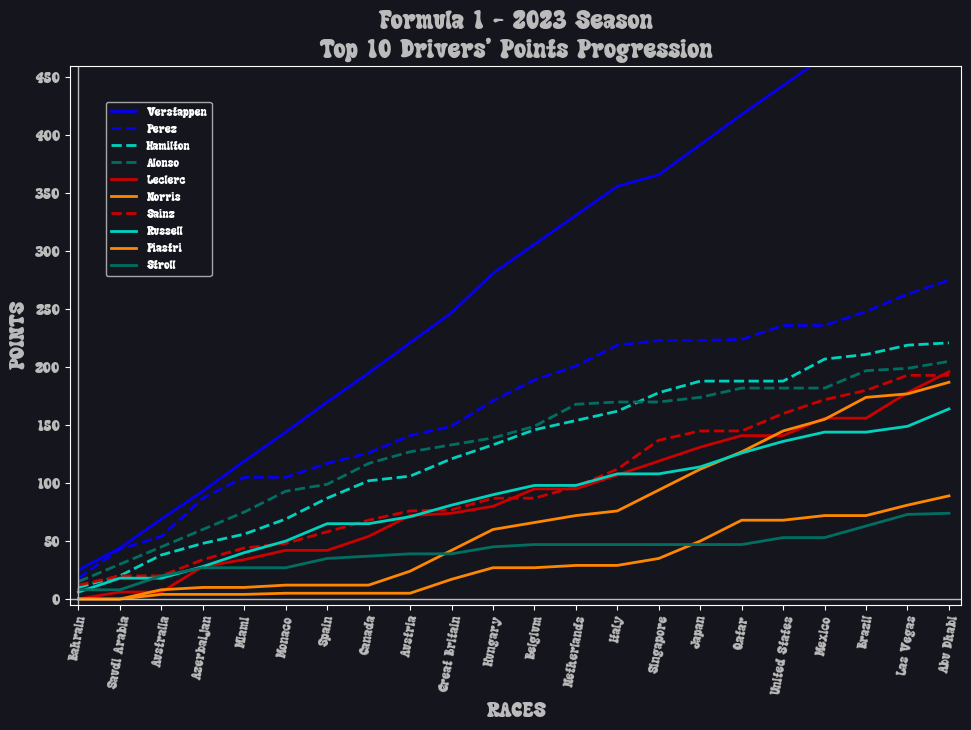

In [70]:
# Extracting Unique Tracks
tracks = Season2023RaceResults['Track'].unique()
tracksSprint = Season2023SprintRaceResults['Track'].unique()

# Setting Up the Plot Style and Appearance
plt.style.use('dark_background')  # Use a valid style like 'dark_background'

plt.rcParams['axes.facecolor'] = '#15151d'  # Customizes the background color of the axes and the figure
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'  # Grid Color: Sets the grid lines to a darker gray (#444444)
plt.rcParams['font.family'] = 'Retro impact'  # Use your custom font 'Magic Vintage Demo'

plt.figure(figsize=(11.5, 7))  # Sets the figure size to 11.5 inches wide and 7 inches tall
plt.axis([-0.2, 21.3, -5, 460])  # Defines the axis limits; the x-axis ranges from -0.2 to 21.3, and the y-axis ranges from -5 to 460

# Assuming assign_color is a function defined elsewhere
c = assign_color('drivers', driverStandingsTop10)

# Plotting the Points Progression
for i in range(10):
    if driverStandingsTop10[i] in ['Sergio Perez', 'Carlos Sainz', 'Lewis Hamilton', 'Fernando Alonso']:
        ls = '--'
    else:
        ls = '-'
    plt.plot(driverPointsTop10[driverStandingsTop10[i]].cumsum(), 
             label=driverStandingsTop10[i].split()[1], 
             c=c[i], linewidth=2, ls=ls)

# Adding Titles and Labels
plt.title('Formula 1 - 2023 Season\nTop 10 Drivers\' Points Progression', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')

# X-Ticks: Sets the x-axis ticks to display the race tracks, rotated by 80 degrees for readability
plt.xticks(range(0, len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
# Y-Ticks: Sets the y-axis ticks at intervals of 50 points, from 0 to 460
plt.yticks(range(0, 460, 50), range(0, 460, 50), fontsize=12, color='#bbbbbb')

# Vertical Line: Adds a vertical line at the start of the x-axis
plt.axvline(0, linewidth=1, color='#bbbbbb')
# Horizontal Line: Adds a horizontal line at the start of the y-axis
plt.axhline(0, linewidth=1, color='#bbbbbb')

plt.legend(loc=(0.04, 0.61), fontsize=9)
plt.show()

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\975068444.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sprintRacePointsNonZero[i]-0.85, i+0.2, "{:2}".format(sprintRacePointsNonZero[i]),


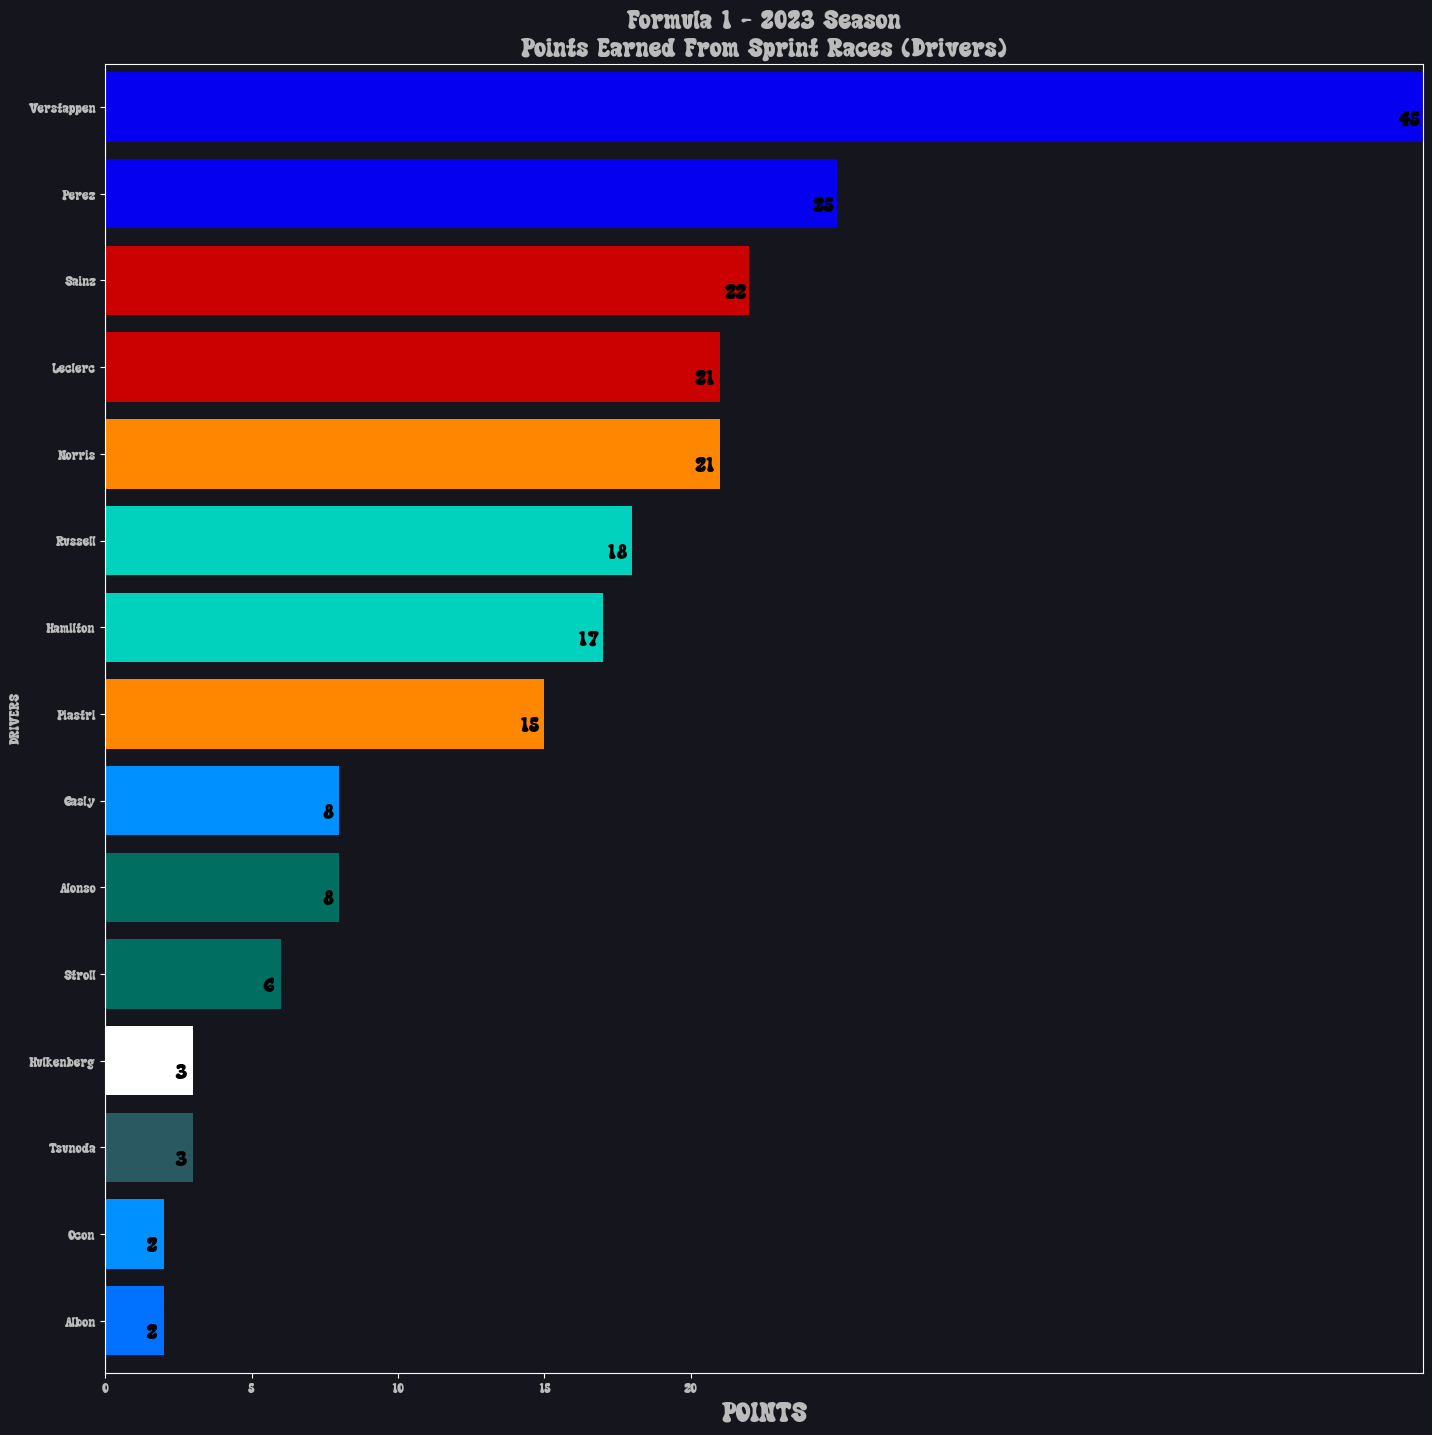

In [71]:
sprintRacePointsNonZero = sprintRacePoints[sprintRacePoints > 0]      
plt.figure(figsize=(17, 17))
plt.axis([4,45,14.6,-0.5])
c = assign_color('drivers', sprintRacePointsNonZero.index)
plt.barh([driver.split()[1] for driver in sprintRacePointsNonZero.index.values], sprintRacePointsNonZero, color=c)
for i in range(len(sprintRacePointsNonZero)):
    plt.text(sprintRacePointsNonZero[i]-0.85, i+0.2, "{:2}".format(sprintRacePointsNonZero[i]), 
             color='k', fontsize=16, fontweight='bold')
plt.title('Formula 1 - 2023 Season\nPoints Earned From Sprint Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=20, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=10, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,22,5), range(0,22,5), color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\3868775681.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sprintRacePointsNonZero[i] - 0.85, i, "{:2}".format(sprintRacePointsNonZero[i]),


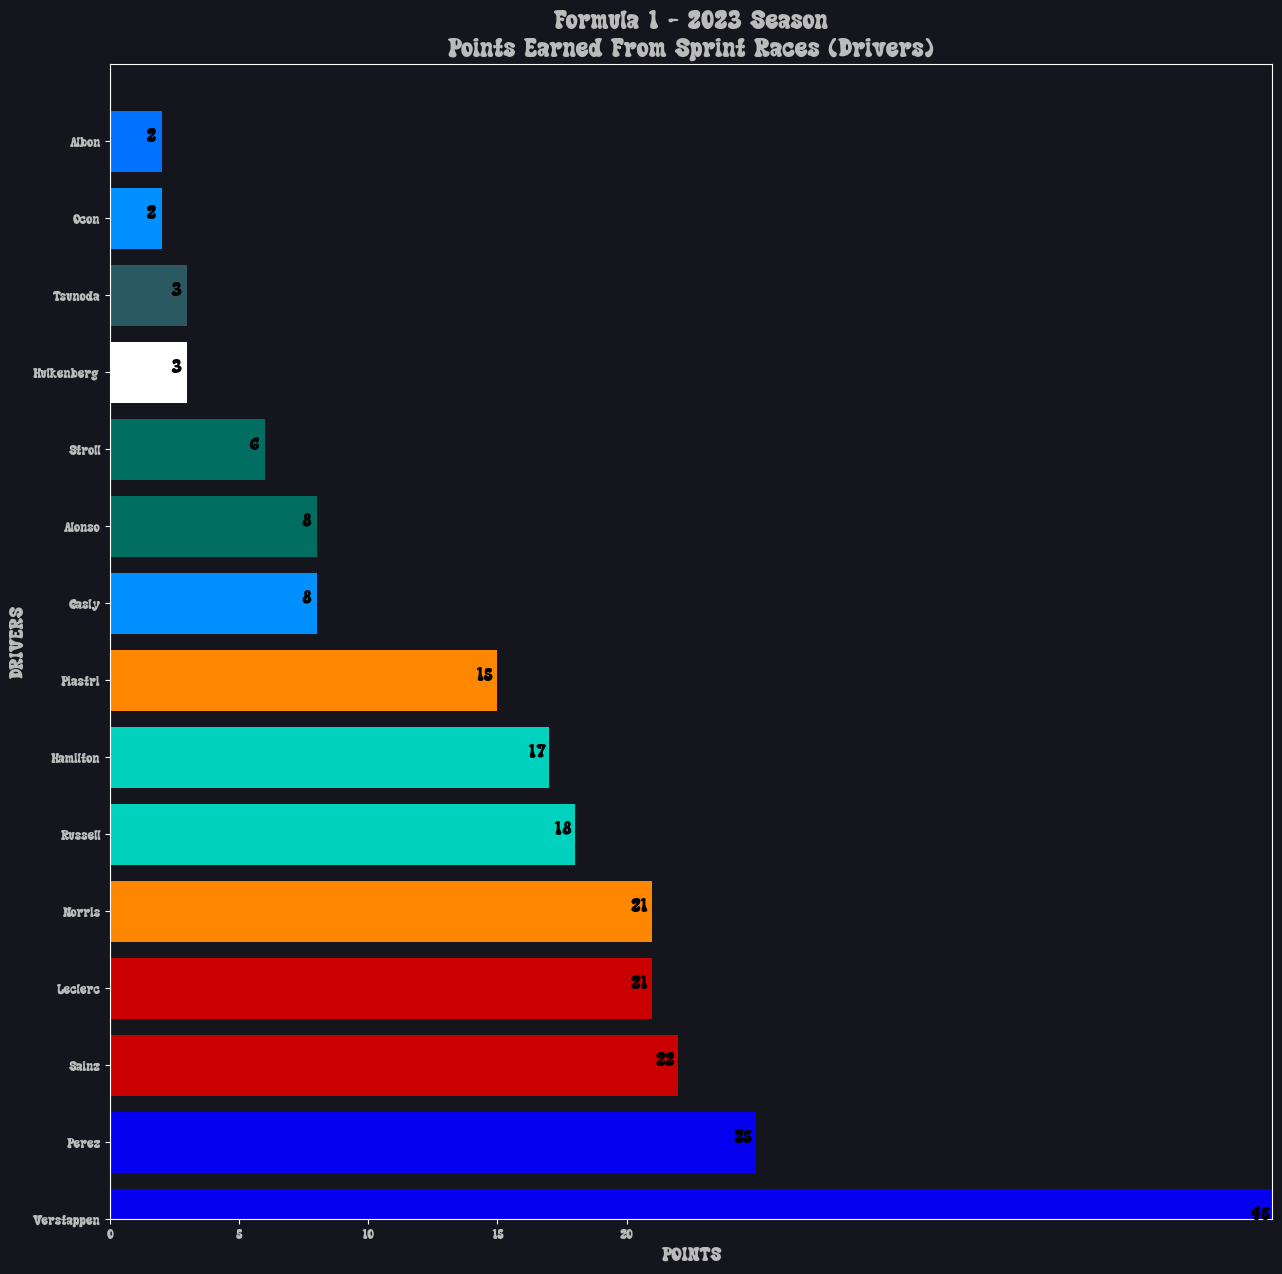

In [72]:
sprintRacePointsNonZero = sprintRacePoints[sprintRacePoints > 0]

# Create the plot
plt.figure(figsize=(15, 15))
plt.axis([0, 45, 0, len(sprintRacePointsNonZero)])  # Correct y-axis direction

# Assign colors
c = assign_color('drivers', sprintRacePointsNonZero.index)

# Plot the horizontal bar chart
plt.barh([driver.split()[1] if len(driver.split()) > 1 else driver for driver in sprintRacePointsNonZero.index.values], 
         sprintRacePointsNonZero, color=c)

# Annotate the bars
for i in range(len(sprintRacePointsNonZero)):
    plt.text(sprintRacePointsNonZero[i] - 0.85, i, "{:2}".format(sprintRacePointsNonZero[i]), 
             color='k', fontsize=14, fontweight='bold')

# Titles and labels
plt.title('Formula 1 - 2023 Season\nPoints Earned From Sprint Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')

# Set ticks and grid
plt.xticks(range(0, 22, 5), range(0, 22, 5), color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')

# Show the plot
plt.show()

## 2023 Season - Constructors Standings

In [74]:
# Calculate total points for each team from race results
racePointsTeam = Season2023RaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
# Calculate total points for each team from sprint race results
sprintRacePointsTeam = Season2023SprintRaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
# Combine the points from race and sprint race results
constructorStandings = (racePointsTeam + sprintRacePointsTeam).fillna(0).sort_values(ascending=False)
# Convert the Series to a DataFrame and reset the index
constructorStandings = pd.DataFrame(constructorStandings).reset_index()
# Add a 'POS' column for positions
constructorStandings['POS'] = range(1, len(constructorStandings) +1) 
# Set 'POS' as the index
constructorStandings.set_index('POS', inplace=True)
constructorStandings

Team  Points
POS                                      
1      Red Bull Racing Honda RBPT   860.0
2                        Mercedes   409.0
3                         Ferrari   406.0
4                McLaren Mercedes   302.0
5    Aston Martin Aramco Mercedes   280.0
6                  Alpine Renault   120.0
7               Williams Mercedes    28.0
8           AlphaTauri Honda RBPT    25.0
9              Alfa Romeo Ferrari    16.0
10                   Haas Ferrari    12.0
11   Aston Martib Aramco Mercedes     0.0

* As a result, **Red Bull** obtained the Constructors champion title by over **400 points** against **Mercedes and Ferrari**. Showing their dominance     of for two consecutive seasons!
* We can say Red Bull was in a league of their own while the real head to head competition was between **Mercedes** and **Ferrari** who came **second**   and **third** respectively with a difference of only **three** points.
* Another fierce competition was between **Williams** and **AlphaTauri** where they took position the **seven** and **eighth** positions respectively      with only **three** between them.
* **Alfa Romeo** and **Haas** also had a thrilling competition aganist  each other coming **ninth** and **tenth** with only **four** points to seperate    them.
* The **McLaren** came in **fourth** close to a hundrend points off the the third position but also being the only team scoring a range of 300 points     in the 2023 season.


## Visual Points Progression of All Teams Throughout The Season

In [77]:
teamNames = constructorStandings['Team'].unique()
teamNames = [team for team in teamNames if team != 'Aston Martib Aramco Mercedes']
teamPoints = {};   teamPointsSprint = {}
trackTeamPtsMerged = Season2023RaceResults.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = Season2023SprintRaceResults.groupby(['Track','Team'])['Points'].sum()
for team in teamNames:
    teamPoints[team] = trackTeamPtsMerged[slice(None), team].reindex(tracks).values
    teamPointsSprint[team] = trackTeamPtsSprintMerged[slice(None), team].reindex(tracksSprint).values
sp = [3, 10, 20]
for team in teamNames:
    for i in range(len(sp)):
        teamPoints[team][sp[i]] = teamPoints[team][sp[i]] + teamPointsSprint[team][i]
teamPoints = {team: points for team, points in teamPoints.items() if np.sum(points) > 0}
teamPointsSprint = {team: points for team, points in teamPointsSprint.items() if np.sum(points) > 0}

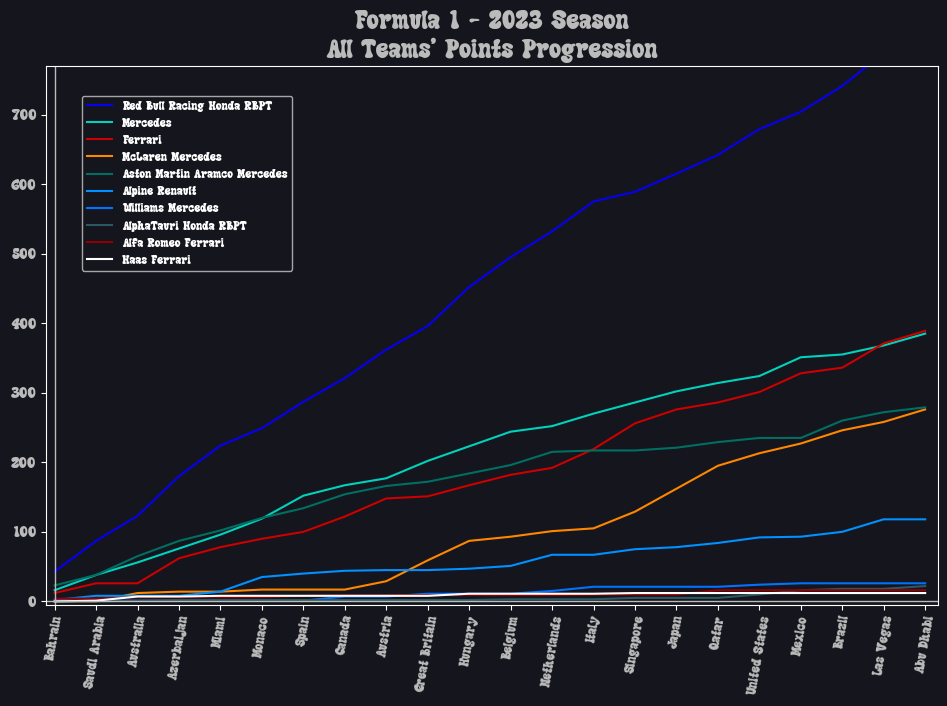

In [78]:
c = assign_color('teams', teamNames)
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,770])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('Formula 1 - 2023 Season\nAll Teams\' Points Progression', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

## 2023 Season - Race Winners

Ever since becoming a Formula 1 fan I have dreamt winning some grands prix beating Max, Lewis, and the rest more times than I can count. But for now I can only dream. Let's visualize the 2023 grands prix winners🥇. 

In [81]:
Season2023RaceResults[Season2023RaceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

No          Driver                        Team  Starting Grid  \
Track                                                                          
Bahrain         1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Saudi Arabia   11    Sergio Perez  Red Bull Racing Honda RBPT              1   
Australia       1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Azerbaijan     11    Sergio Perez  Red Bull Racing Honda RBPT              3   
Miami           1  Max Verstappen  Red Bull Racing Honda RBPT              9   
Monaco          1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Spain           1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Canada          1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Austria         1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Great Britain   1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Hungary         1  Max Verstappen  Red Bull Racing Honda RBPT              2   
Belgium         1  Max Verstappen  Red Bull Racing Honda RBPT              6   
Netherlands     1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Italy           1  Max Verstappen  Red Bull Racing Honda RBPT              2   
Singapore      55    Carlos Sainz                     Ferrari              1   
Japan           1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Qatar           1  Max Verstappen  Red Bull Racing Honda RBPT              1   
United States   1  Max Verstappen  Red Bull Racing Honda RBPT              6   
Mexico          1  Max Verstappen  Red Bull Racing Honda RBPT              3   
Brazil          1  Max Verstappen  Red Bull Racing Honda RBPT              1   
Las Vegas       1  Max Verstappen  Red Bull Racing Honda RBPT              2   
Abu Dhabi       1  Max Verstappen  Red Bull Racing Honda RBPT              1   

               Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Track                                                                      
Bahrain          57  1:33:56.736      25              No         1:36.236  
Saudi Arabia     50  1:21:14.894      25              No         1:32.188  
Australia        58  2:32:28.371      25              No         1:20.342  
Azerbaijan       51  1:32:42.436      25              No         1:44.589  
Miami            57  1:27:38.241      26             Yes         1:29.708  
Monaco           78  1:48:51.980      25              No         1:16.604  
Spain            66  1:27:57.940      26             Yes         1:16.330  
Canada           70  1:33:58.348      25              No         1:15.594  
Austria          71  1:25:33.607      26             Yes         1:07.012  
Great Britain    52  1:25:16.938      26             Yes         1:30.275  
Hungary          70  1:38:08.634      26             Yes         1:20.504  
Belgium          44  1:22:30.450      25              No         1:48.922  
Netherlands      72  2:24:04.411      25              No         1:13.889  
Italy            51  1:13:41.143      25              No         1:25.240  
Singapore        62  1:46:37.418      25              No         1:37.666  
Japan            53  1:30:58.421      26             Yes         1:34.183  
Qatar            57  1:27:39.168      26             Yes         1:24.319  
United States    56  1:35:21.362      25              No         1:40.028  
Mexico           71  2:02:30.814      25              No         1:21.644  
Brazil           71  1:56:48.894      25              No         1:13.422  
Las Vegas        50  1:29:08.289      25              No         1:35.614  
Abu Dhabi        58  1:27:02.624      26             Yes         1:26.993

* we'll that's not a shocker. **Max** dominated the whole season only his teamate **Perez** and **Sainz** from **Ferrari** took a couple of wins from him.
* Let's visualize and see how that looks!

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\1048848499.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(winners[i]-1, i+0.15, "{:>3}".format(winners[i]), fontsize=19, fontweight='bold', color='k')


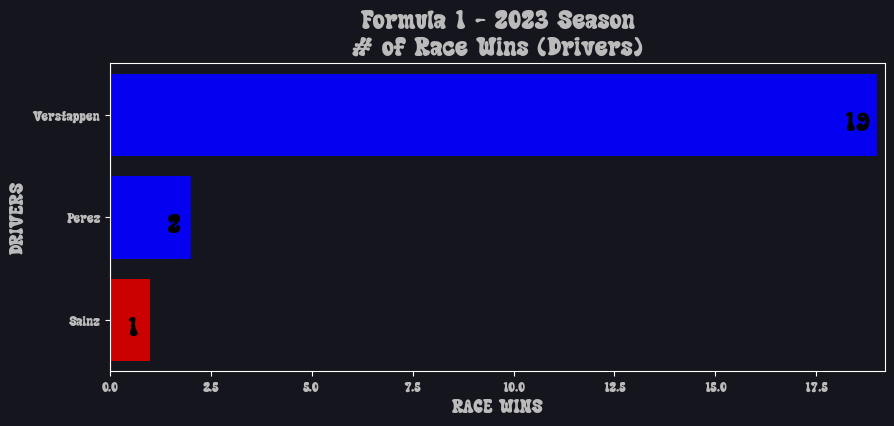

In [83]:
winners = Season2023RaceResults[Season2023RaceResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', winners.index)
plt.figure(figsize=(10,4))
plt.axis([0,19.2,2.5,-0.5])
plt.barh([driver.split()[1] for driver in winners.index], winners, color=c)
for i in range(len(winners)):
    plt.text(winners[i]-1, i+0.15, "{:>3}".format(winners[i]), fontsize=19, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Race Wins (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## 2023 Season - Pole Positions

If you wonder which drivers were polesitters in all races of 2022 Season, take a look at the two tables below. Keep in mind that the broad one is for those with regular race weekend structure i.e. qualifying sessions on Saturday; whereas the second one is where Sprint races were available in the weekend, hence organized on Friday:

In [86]:
#This filters the season2023RaceResults DataFrame to only include rows where the Starting Grid position is 1. 
#.drop('Starting Grid', axis=1): Removes the Starting Grid column from the DataFrame since it's no longer needed after filtering for pole positions.
#These tracks are dropped because, in these instances, the pole position was determined by a sprint race rather than traditional qualifying.
season2023PolePos = Season2023RaceResults[Season2023RaceResults['Starting Grid'] == 1].set_index('Track') \
    .drop('Starting Grid', axis=1).drop(['Azerbaijan', 'Austria', 'Belgium', 'Qatar', 'United States', 'Brazil'], axis=0)
#Count Pole Positions by Driver
polePos = {}
for driver in season2023PolePos['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2023PolePos

Position  No           Driver                        Team  Laps  \
Track                                                                           
Bahrain              1   1   Max Verstappen  Red Bull Racing Honda RBPT    57   
Saudi Arabia         1  11     Sergio Perez  Red Bull Racing Honda RBPT    50   
Australia            1   1   Max Verstappen  Red Bull Racing Honda RBPT    58   
Miami                2  11     Sergio Perez  Red Bull Racing Honda RBPT    57   
Monaco               1   1   Max Verstappen  Red Bull Racing Honda RBPT    78   
Spain                1   1   Max Verstappen  Red Bull Racing Honda RBPT    66   
Canada               1   1   Max Verstappen  Red Bull Racing Honda RBPT    70   
Great Britain        1   1   Max Verstappen  Red Bull Racing Honda RBPT    52   
Hungary              4  44   Lewis Hamilton                    Mercedes    70   
Netherlands          1   1   Max Verstappen  Red Bull Racing Honda RBPT    72   
Italy                3  55     Carlos Sainz                     Ferrari    51   
Singapore            1  55     Carlos Sainz                     Ferrari    62   
Japan                1   1   Max Verstappen  Red Bull Racing Honda RBPT    53   
Mexico               3  16  Charles Leclerc                     Ferrari    71   
Las Vegas            2  16  Charles Leclerc                     Ferrari    50   
Abu Dhabi            1   1   Max Verstappen  Red Bull Racing Honda RBPT    58   

              Time/Retired  Points Set Fastest Lap Fastest Lap Time  
Track                                                                
Bahrain        1:33:56.736      25              No         1:36.236  
Saudi Arabia   1:21:14.894      25              No         1:32.188  
Australia      2:32:28.371      25              No         1:20.342  
Miami               +5.384      18              No         1:30.560  
Monaco         1:48:51.980      25              No         1:16.604  
Spain          1:27:57.940      26             Yes         1:16.330  
Canada         1:33:58.348      25              No         1:15.594  
Great Britain  1:25:16.938      26             Yes         1:30.275  
Hungary            +39.134      12              No         1:21.601  
Netherlands    2:24:04.411      25              No         1:13.889  
Italy              +11.193      15              No         1:25.501  
Singapore      1:46:37.418      25              No         1:37.666  
Japan          1:30:58.421      26             Yes         1:34.183  
Mexico             +23.124      15              No         1:22.332  
Las Vegas           +2.070      18              No         1:35.669  
Abu Dhabi      1:27:02.624      26             Yes         1:26.993

* We see **Max** dominating again. His dominance here correlates to his wins as we saw in the previous table.
* **Hamliton** appears to have won once in his **Mercedes**.
* Let's not forget **Perez's** double win to keep the **Red Bull**  team at the top.
* According to the table only **Max** who won the pole position also won the **fastest** lap in the season.

In [88]:
season2023PolePosSprint = Season2023SprintRaceResults[Season2023SprintRaceResults['Starting Grid'] == 1] \
    .set_index('Track').drop('Starting Grid', axis=1)
polePosSprint = {}
for driver in season2023PolePosSprint['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2023PolePosSprint

Position  No           Driver                        Team  Laps  \
Track                                                                           
Azerbaijan           2  16  Charles Leclerc                     Ferrari    17   
Austria              1   1   Max Verstappen  Red Bull Racing Honda RBPT    24   
Belgium              1   1   Max Verstappen  Red Bull Racing Honda RBPT    11   
Qatar                1  81    Oscar Piastri            McLaren Mercedes    19   
United States        1   1   Max Verstappen  Red Bull Racing Honda RBPT    19   
Brazil               2   4     Lando Norris            McLaren Mercedes    24   

              Time/Retired  Points  
Track                               
Azerbaijan          +4.463       7  
Austria          30:26.730       8  
Belgium          24:58.433       8  
Qatar            35:01.297       8  
United States    31:30.849       8  
Brazil              +4.287       7

Now, for the qualifying sessions on Friday. Remember that in such race weekends, these formed the Sprint races' starting grid; that's why we see less information, as I grabbed them from another dataset. Here, Verstappen took three of the poles in Austria GP, Belgium GP and United States GP.

We also see the McLaren team taking lead in two Grand Prix which were the only wins for them in the qualifiers and the sprint race.
Leclrec also takes  a win for the Reds..

Anyway, the visual below will tell us the unique drivers and their counts for pole positions in 2022:

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\144282980.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(PolePositions[i]-0.4, i+0.15, PolePositions[i], fontsize=18, fontweight='bold', color='k')


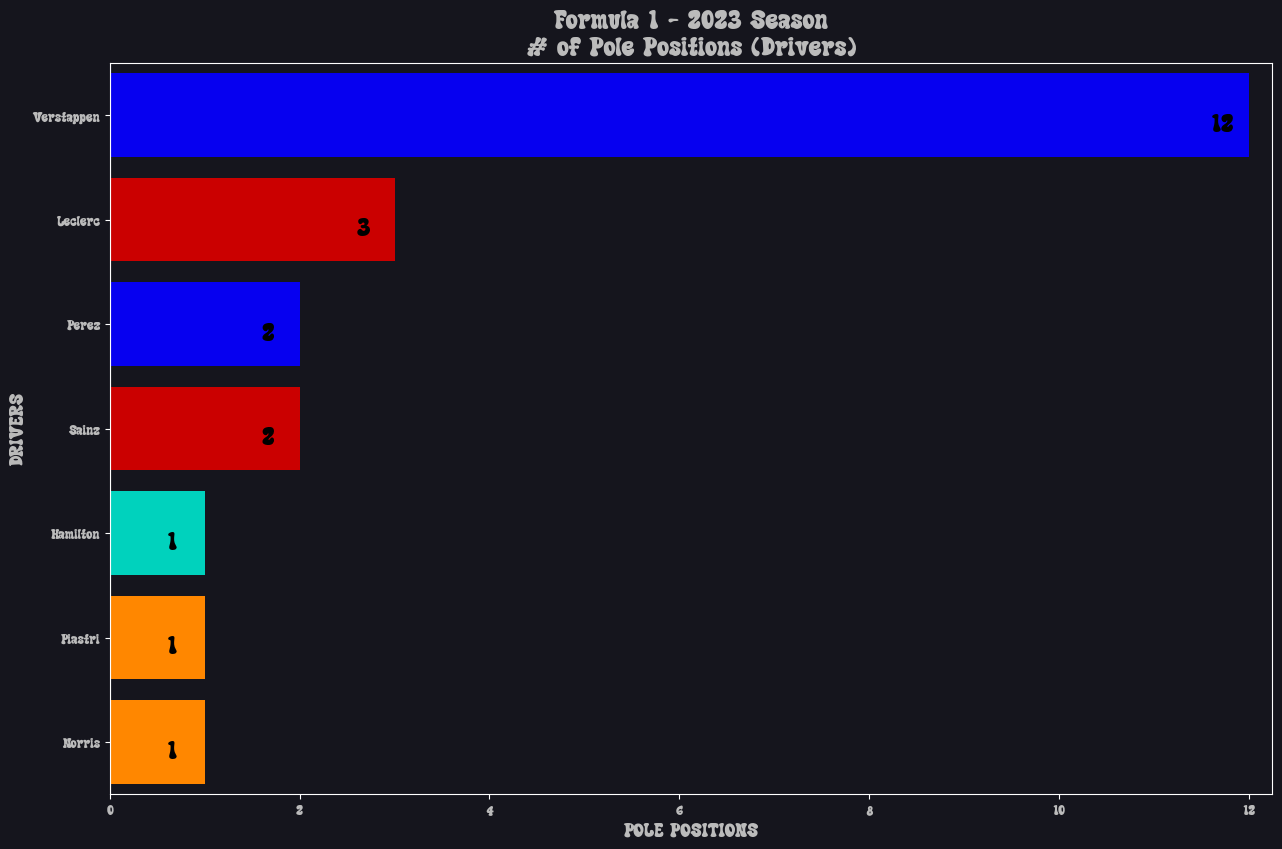

In [90]:
PolePositions = pd.Series(polePos).sort_values(ascending=False)
c = assign_color('drivers', PolePositions.index)
plt.figure(figsize=(15,9.5))
plt.axis([0,12.25,6.5,-0.5])
plt.barh([driver.split()[1] for driver in PolePositions.index], PolePositions, color=c)
plt.title('Formula 1 - 2023 Season\n# of Pole Positions (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(PolePositions)):
    plt.text(PolePositions[i]-0.4, i+0.15, PolePositions[i], fontsize=18, fontweight='bold', color='k')
plt.xlabel('POLE POSITIONS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

In general, Max was the driver with the most poles, total of 12 times! But t his teammate Perez achieved it only itwice an improvement by one from last year.nr!

Similarly,shown above Hamliton got a win compared to the year before where he didn't have any pole position. Unfortunately his teammate is nowhere to be seen thus making the Mercedes uncompetitive aganist the RedBull. 2007!

## 2023 Season - Podium Finishes
As always, it is a great feeling for an F1 driver to step on the podium for any race, then lift up the trophy to the air and drink the champagne; celebrating the achievement with his team members and fans altogether... 
Here, it's time to learn which and how many times drivers completed races in top three this season

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\3223891649.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(podiumFinishes[i]-0.95, i+0.15, "{:>3}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')


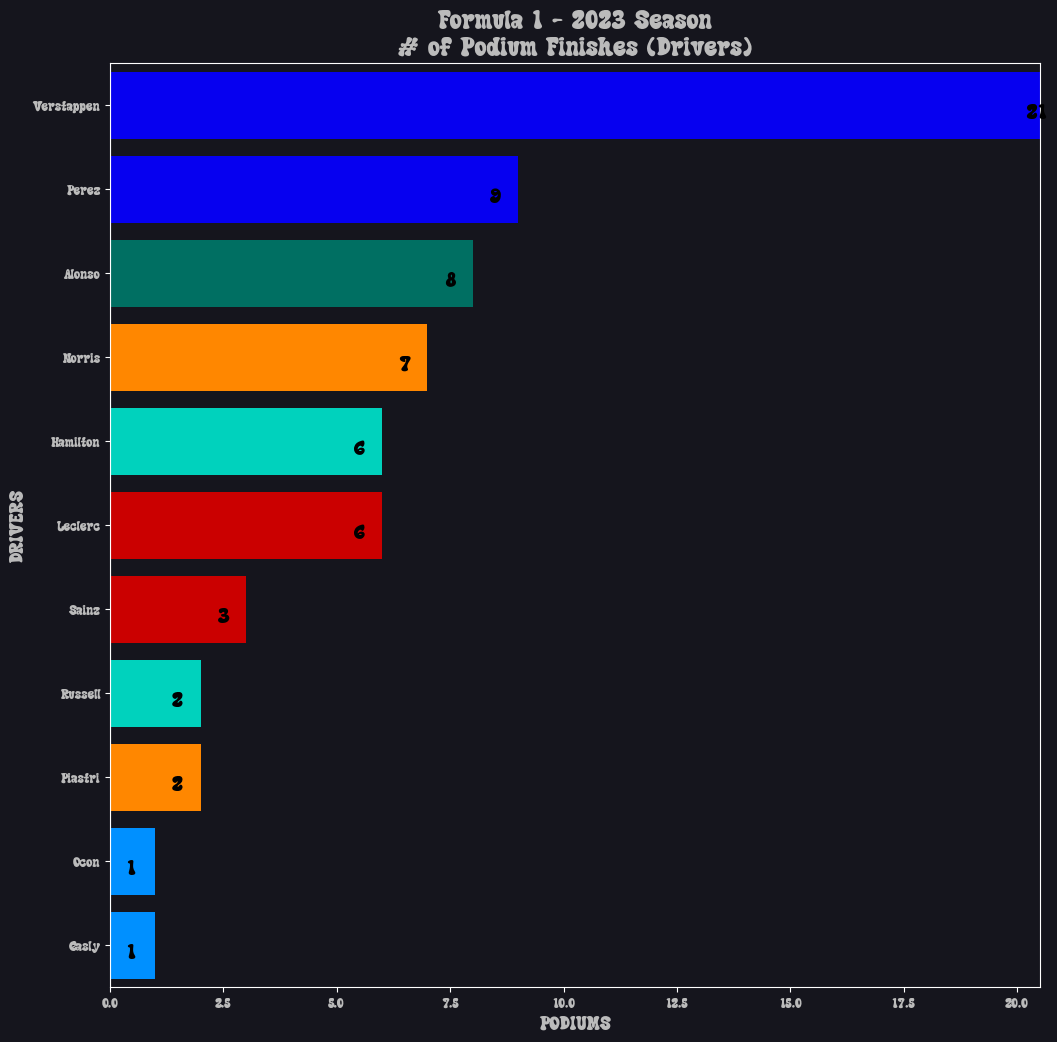

In [93]:
#Filter Podium Finishes
podiumFinishes = Season2023RaceResults[Season2023RaceResults['Position'].isin(['1','2','3'])]['Driver'].value_counts()
c = assign_color('drivers', podiumFinishes.index)         #Assign Colors to Drivers
plt.figure(figsize=(12,12))                                 #Creates a new figure for the plot with a size of 9 inches by 5 inches.
plt.axis([0,20.5,10.5,-0.5])                               #Sets the axis limits for the plot:
#[0, 17.5]: The x-axis will range from 0 to 17.5, corresponding to the number of podium finishes.
#[6.5, -0.5]: The y-axis will range from 6.5 to -0.5, with negative values indicating that the y-axis is inverted, typically to have the top driver at the top of the chart.

plt.barh([driver.split()[1] for driver in podiumFinishes.index], podiumFinishes, color=c)   #Creates a horizontal bar chart and Generates a list of driver last names by splitting the full names in the podiumFinishes index and selecting the last name (split()[1]).
for i in range(len(podiumFinishes)):
    plt.text(podiumFinishes[i]-0.95, i+0.15, "{:>3}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')
#plt.text(...): Adds text labels to the bars.
#podiumFinishes[i]-0.95: Positions the text slightly to the left of the bar's end.
#i+0.15: Positions the text slightly above the center of the bar on the y-axis.
#"{:>3}".format(podiumFinishes[i]): Formats the text to display the number of podium finishes with right alignment.
#fontsize=16, fontweight='bold', color='k': Sets the text size, weight, and color (black).
plt.title('Formula 1 - 2023 Season\n# of Podium Finishes (Drivers)', fontsize=19, weight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
#plt.title(...): Sets the title of the chart with a specific font size, weight, and color.
#plt.xlabel('PODIUMS', ...): Labels the x-axis as "PODIUMS" with formatting.
#plt.ylabel('DRIVERS', ...): Labels the y-axis as "DRIVERS" with formatting.
#plt.xticks(color='#bbbbbb'): Sets the color of the x-axis tick labels.
#plt.yticks(color='#bbbbbb'): Sets the color of the y-axis tick labels.
#plt.axvline(0, color='#bbbbbb'): Adds a vertical line at x=0 for visual reference.
plt.show()

Yeah, it is not surprising to see that the champion **Max Verstappen** also had the most podium finishes in 2023 Season, with total of 21; which was 11 podiums higher than his teammate Sergio Perez!

**Alonso** from the **Aston Martin** crew came in third with 7 podium finishes. **Lando** for **McLaren* come in fourth.
**Hamilton** and **Leclerc** tie at fifth position with both having six podium finshes.


## 2023 Season - Top 10 Finishes
To make it even broader, now let's count all drivers' top 10 finishes this time. That is, we are seeking the answer for the question: how many times did the drivers complete races with points in 2023 Season?

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\1707792981.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top10Finishes[i]-0.83, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')


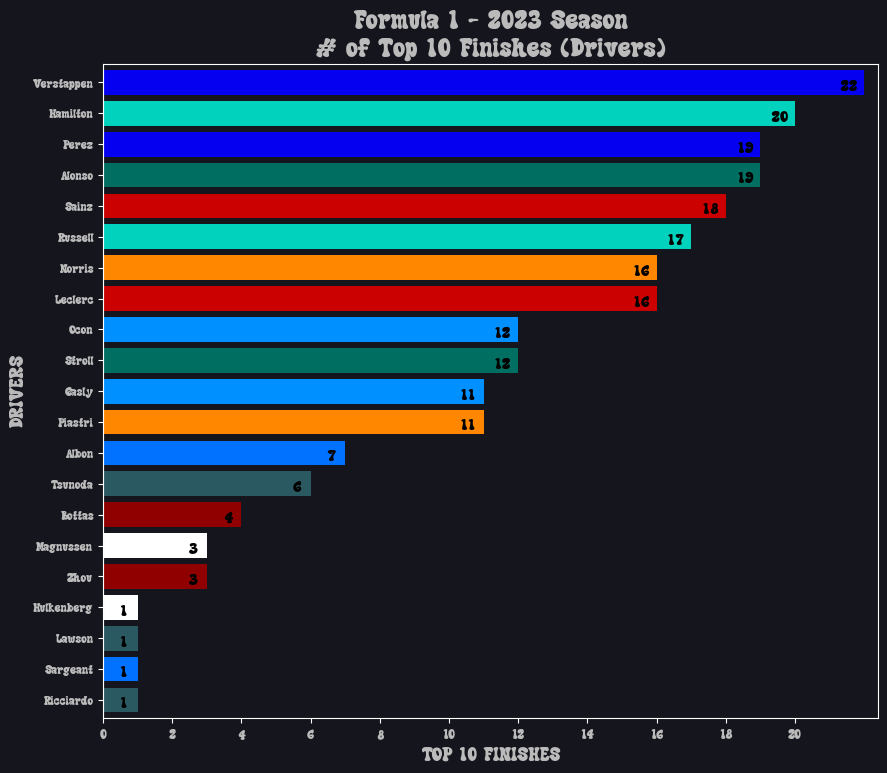

In [96]:
#include only rows where the Position is within the top 10
top10Finishes = Season2023RaceResults[Season2023RaceResults['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
#[str(i) for i in range(1, 11)]: Creates a list of strings representing positions "1" through "10"
#['Driver'].value_counts(): counts the number of times each driver appears in the top 10
c = assign_color('drivers', top10Finishes.index)
#top10Finishes.index: The list of drivers who have finished in the top 10 is passed to this function, and it returns a list of colors (c) corresponding to each driver.
plt.figure(figsize=(10,8.5))
plt.axis([0,22.4,20.6,-0.6])
#plt.figure(figsize=(10, 6.5)): Creates a figure with a specified size (10 inches wide by 6.5 inches tall).

plt.barh([" ".join(driver.split()[1:]) for driver in top10Finishes.index], top10Finishes, color=c)
for i in range(len(top10Finishes)):
    plt.text(top10Finishes[i]-0.83, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')
#plt.text(): Adds text annotations to the bars.
#top10Finishes[i] - 0.83: Positions the text slightly to the left of the end of each bar.
#i + 0.25: Adjusts the vertical position of the text so it aligns correctly with each bar.
#"{:>3}".format(top10Finishes[i]): Formats the number of top 10 finishes with right-alignment in a 3-character space.
#fontsize=12, fontweight='bold', color='k': Sets the font size, weight (bold), and color (black) for the text.

plt.title('Formula 1 - 2023 Season\n# of Top 10 Finishes (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,22,2), range(0,22,2), color='#bbbbbb')
#plt.xticks(): Sets the ticks on the x-axis from 0 to 20 in steps of 2, with the tick labels colored light gray (#bbbbbb).
#plt.yticks(): Colors the y-axis tick labels light gray and sets the font size to 9.
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb') #plt.axvline(0): Draws a vertical line at x = 0 to visually separate the chart from the axis, colored light gray.
plt.show()

* Well well well we see a bit of competition here with **Max** appearing 22 times in the top 10. Safe to say he was in the top 10 in every Grand Prix right?
* Lewis comes in second 20 podium finishes  while Perez and Alonso come in third with 19 wins.
* We also see stiff competition from the middle of the table teams mostly tying or having a difference of one from each other.
* The last four drivers tie by one podium finish. Not looking good for the Haas team!


## 2023 Season - Fastest Laps (+1 Pt) in Race Sessions
Since 2019, an additional point is awarded to the driver who set the fastest lap time in Sunday's race session. Of course, 2023 Season was like no other in terms of grabbing this valuable point for any driver which could affect their placements in Drivers Standings! As part of the race strategy, sometimes we witnessed a few drivers and teams to steal the point from their rivals when there were a couple of laps remaining, such as by putting the frest set of soft tyres and the gap behind the driver was so large, even there was no allegation for winning the race! However, the only important condition is that the driver must finish in the top 10 in order to get the fastest lap point.

In the table below, we can observe which drivers achieved to put the fastest lap point into their pockets, through all races of 2023 Season

In [99]:
Season2023RaceResults[Season2023RaceResults['Set Fastest Lap'] == 'Yes'].set_index('Track')

Position  No           Driver                          Team  \
Track                                                                       
Bahrain             16  24      Guanyu Zhou            Alfa Romeo Ferrari   
Saudi Arabia         2   1   Max Verstappen    Red Bull Racing Honda RBPT   
Australia            5  11     Sergio Perez    Red Bull Racing Honda RBPT   
Azerbaijan           8  63   George Russell                      Mercedes   
Miami                1   1   Max Verstappen    Red Bull Racing Honda RBPT   
Monaco               4  44   Lewis Hamilton                      Mercedes   
Spain                1   1   Max Verstappen    Red Bull Racing Honda RBPT   
Canada               6  11     Sergio Perez    Red Bull Racing Honda RBPT   
Austria              1   1   Max Verstappen    Red Bull Racing Honda RBPT   
Great Britain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
Hungary              1   1   Max Verstappen    Red Bull Racing Honda RBPT   
Belgium              4  44   Lewis Hamilton                      Mercedes   
Netherlands          2  14  Fernando Alonso  Aston Martin Aramco Mercedes   
Italy               12  81    Oscar Piastri              McLaren Mercedes   
Singapore            3  44   Lewis Hamilton                      Mercedes   
Japan                1   1   Max Verstappen    Red Bull Racing Honda RBPT   
Qatar                1   1   Max Verstappen    Red Bull Racing Honda RBPT   
United States        8  22     Yuki Tsunoda         AlphaTauri Honda RBPT   
Mexico               2  44   Lewis Hamilton                      Mercedes   
Brazil               2   4     Lando Norris              McLaren Mercedes   
Las Vegas           10  81    Oscar Piastri              McLaren Mercedes   
Abu Dhabi            1   1   Max Verstappen    Red Bull Racing Honda RBPT   

               Starting Grid  Laps Time/Retired  Points Set Fastest Lap  \
Track                                                                     
Bahrain                   13    56       +1 lap       0             Yes   
Saudi Arabia              15    50       +5.335      19             Yes   
Australia                 20    58       +3.320      11             Yes   
Azerbaijan                11    51      +74.240       5             Yes   
Miami                      9    57  1:27:38.241      26             Yes   
Monaco                     5    78      +39.062      13             Yes   
Spain                      1    66  1:27:57.940      26             Yes   
Canada                    12    70      +51.028       9             Yes   
Austria                    1    71  1:25:33.607      26             Yes   
Great Britain              1    52  1:25:16.938      26             Yes   
Hungary                    2    70  1:38:08.634      26             Yes   
Belgium                    3    44      +49.671      13             Yes   
Netherlands                5    72       +3.744      19             Yes   
Italy                      7    51      +73.074       0             Yes   
Singapore                  5    62       +1.269      16             Yes   
Japan                      1    53  1:30:58.421      26             Yes   
Qatar                      1    57  1:27:39.168      26             Yes   
United States             11    56      +74.385       5             Yes   
Mexico                     6    71      +13.875      19             Yes   
Brazil                     6    71       +8.227      19             Yes   
Las Vegas                 18    50      +29.496       2             Yes   
Abu Dhabi                  1    58  1:27:02.624      26             Yes   

              Fastest Lap Time  
Track                           
Bahrain               1:33.996  
Saudi Arabia          1:31.906  
Australia             1:20.235  
Azerbaijan            1:43.370  
Miami                 1:29.708  
Monaco                1:15.650  
Spain                 1:16.330  
Canada                1:14.481  
Austria               1:07.012  
G

* **MAX** literally dominated everything in the season having  won points for the fast lap nine times! 
* We can tell the **Mercedes** came in second with five  wins. Four from **Lewis Hamilton** and one by **George Russell**.
* **Tsunoda**, **Zhou** and **Alonso** also took a win for their teams **Tauri**, **Romeo** and **Aston Martin** respectively.
* The **McLaren** team was also represented by both drivers **Piastri** taking two wins while **Lando** took the Brazil GP win

## 2023 Season - Qualifying Analysis
Now is the time for the qualifying analysis of this season. Let's learn who set the fastest lap time on Saturday (or Friday if Sprint race was featured) of each race weekend, by checking the table below:

In [102]:
Season2023QualifyingResults[Season2023QualifyingResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

No           Driver                        Team        Q1  \
Track                                                                      
Bahrain         1   Max Verstappen  Red Bull Racing Honda RBPT  1:31.295   
Saudi Arabia   11     Sergio Perez  Red Bull Racing Honda RBPT  1:29.244   
Australia       1   Max Verstappen  Red Bull Racing Honda RBPT  1:17.384   
Azerbaijan     16  Charles Leclerc                     Ferrari  1:41.269   
Miami          11     Sergio Perez  Red Bull Racing Honda RBPT  1:27.713   
Monaco          1   Max Verstappen  Red Bull Racing Honda RBPT  1:12.386   
Spain           1   Max Verstappen  Red Bull Racing Honda RBPT  1:13.615   
Canada          1   Max Verstappen  Red Bull Racing Honda RBPT  1:20.851   
Austria         1   Max Verstappen  Red Bull Racing Honda RBPT  1:05.116   
Great Britain   1   Max Verstappen  Red Bull Racing Honda RBPT  1:29.428   
Hungary        44   Lewis Hamilton                    Mercedes  1:18.577   
Belgium         1   Max Verstappen  Red Bull Racing Honda RBPT  1:58.515   
Netherlands     1   Max Verstappen  Red Bull Racing Honda RBPT  1:20.965   
Italy          55     Carlos Sainz                     Ferrari  1:21.965   
Singapore      55     Carlos Sainz                     Ferrari  1:32.339   
Japan           1   Max Verstappen  Red Bull Racing Honda RBPT  1:29.878   
Qatar           1   Max Verstappen  Red Bull Racing Honda RBPT  1:25.007   
United States  16  Charles Leclerc                     Ferrari  1:36.061   
Mexico         16  Charles Leclerc                     Ferrari  1:18.401   
Brazil          1   Max Verstappen  Red Bull Racing Honda RBPT  1:10.436   
Las Vegas      16  Charles Leclerc                     Ferrari  1:33.617   
Abu Dhabi       1   Max Verstappen  Red Bull Racing Honda RBPT  1:24.160   

                     Q2        Q3  Laps  
Track                                    
Bahrain        1:30.503  1:29.708    15  
Saudi Arabia   1:28.635  1:28.265    18  
Australia      1:17.056  1:16.732    24  
Azerbaijan     1:41.037  1:40.203    21  
Miami          1:27.328  1:26.841    20  
Monaco         1:11.908  1:11.365    30  
Spain          1:12.760  1:12.272    20  
Canada         1:19.092  1:25.858    26  
Austria        1:04.951  1:04.391    24  
Great Britain  1:27.702  1:26.720    26  
Hungary        1:17.427  1:16.609    20  
Belgium        1:52.784  1:46.168    22  
Netherlands    1:18.856  1:10.567    31  
Italy          1:20.991  1:20.294    20  
Singapore      1:31.439  1:30.984    20  
Japan          1:29.964  1:28.877    12  
Qatar          1:24.483  1:23.778    19  
United States  1:35.004  1:34.723    21  
Mexico         1:17.901  1:17.166    17  
Brazil         1:10.162  1:10.727    18  
Las Vegas      1:32.775  1:32.726    23  
Abu Dhabi      1:23.740  1:23.445    15

Yeah, from this table, we again come across **Max Verstappen's** name most of the times by setting the fastest lap time in the qualifying sessions, by looking at the Q3 column (well, there is a reason for why I called it the fastest lap time) As you can realize that these times are better than those in Q1 and Q2 
Next, let's observe the drivers and the numbers of their fastest lap times set in qualifying sessions with the visual below:

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\2470388332.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(fastestTimeQualifying[i]-0.35, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')


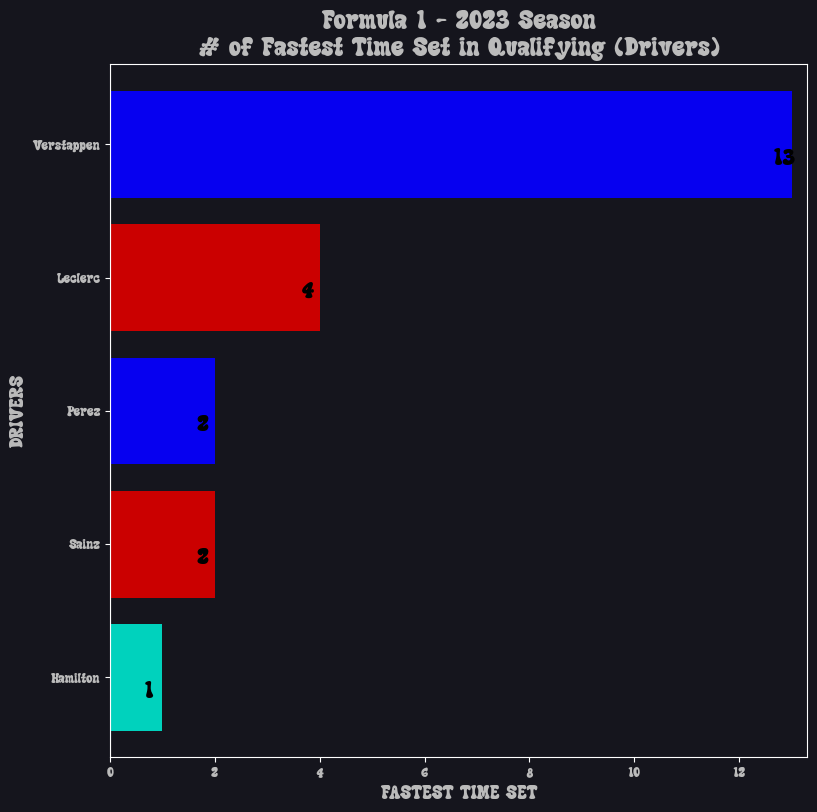

In [104]:
fastestTimeQualifying = Season2023QualifyingResults[Season2023QualifyingResults['Position'] == '1']['Driver'].value_counts()
#season2022QualifyingResults[season2022QualifyingResults['Position'] == '1']:
#filters the season2022QualifyingResults o include only the rows where the Position is 1, which corresponds to the driver who set the fastest time in each qualifying session.
#['Driver'].value_counts(): the code counts how many times each driver appears in the list of drivers who set the fastest qualifying time.
#assign_color('drivers', fastestTimeQualifying.index): assigns colors to each driver based on their name. 

c = assign_color('drivers', fastestTimeQualifying.index)

plt.figure(figsize=(9,9))
plt.axis([0,13.3,4.6,-0.6])
#plt.figure(figsize=(9,5)):Creates a figure with a specified size of 9 inches wide by 5 inches tall.
#plt.axis([0,9.3,5.6,-0.6]):Manually sets the axis limits:

plt.barh([driver.split()[1] for driver in fastestTimeQualifying.index], fastestTimeQualifying, color=c)
#[driver.split()[1] for driver in fastestTimeQualifying.index]:This list comprehension creates the labels for the y-axis, typically using the drivers' last names. 
#fastestTimeQualifying:The lengths of the bars represent the number of times each driver set the fastest qualifying time.

for i in range(len(fastestTimeQualifying)):
    plt.text(fastestTimeQualifying[i]-0.35, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')
#plt.text(): Adds text annotations to the bars.
#fastestTimeQualifying[i]-0.35: Positions the text slightly to the left of the end of each bar.
#i+0.15: Adjusts the vertical position of the text so it aligns correctly with each bar.
#fastestTimeQualifying[i]: The actual value (number of fastest qualifying times) is displayed inside or next to the bar.
#fontsize=17, fontweight='bold', color='k': Sets the font size to 17, makes the text bold, and colors it black ('k').

plt.title('Formula 1 - 2023 Season\n# of Fastest Time Set in Qualifying (Drivers)', fontsize=19, fontweight='bold', 
          color='#bbbbbb')
plt.xlabel('FASTEST TIME SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
#plt.xticks() and plt.yticks(): Sets the color of the tick labels on both axes to light gray ('#bbbbbb').

plt.axvline(0, color='#bbbbbb')  #Draws a vertical line at x = 0 to visually separate the chart from the axis, also colored light gray.

plt.show()

## 2023 Season - DNF Analysis
The next section of the analyses will be about DNFs (Did Not Finish). You know, it might be shameful for any driver to retire from any race because of the reasons such as self-driving mistakes ending up hitting the barriers or being stuck at sandpool, receiving performance-impacting damages by collision with other rivals or mechanical failures (e.g. engine, transmission).

This bar chart below tells us the total number of DNFs of all drivers experienced in 2023 Season:

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\2213701317.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')


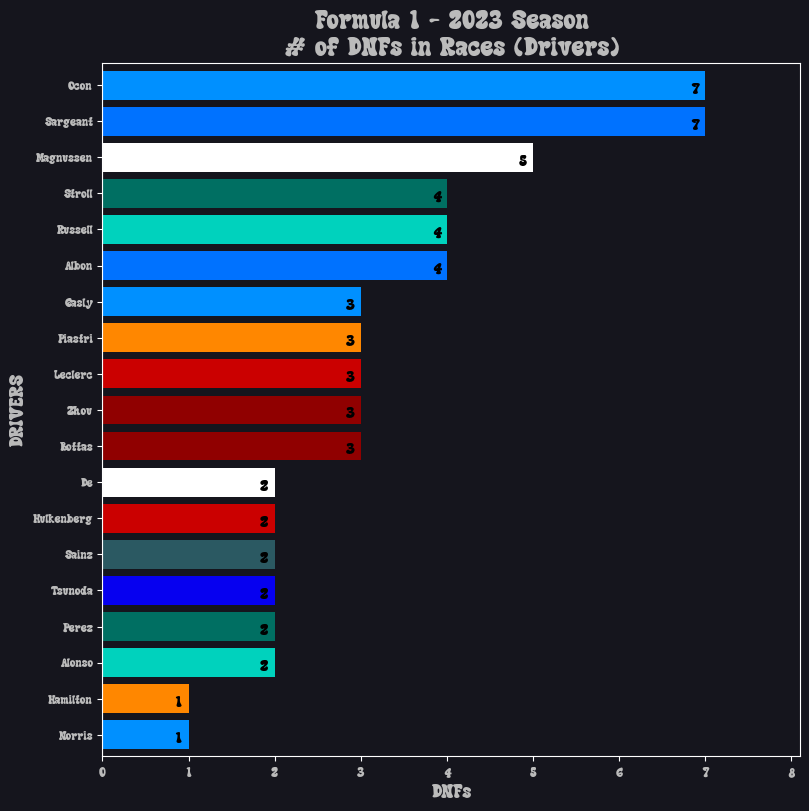

In [106]:
DNFdriver = Season2023RaceResults[Season2023RaceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
#season2023RaceResults['Time/Retired'] == 'DNF': Filters the season2023RaceResults where the Time/Retired column is equal to 'DNF'
c = assign_color('drivers', DNFdriver.index)
plt.figure(figsize=(9,9))
plt.axis([0,8.1,18.6,-0.6])
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver, color=c)
for i in range(len(DNFdriver)):
    plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')
#plt.text(): Adds text annotations to the bars.
#DNFdriver[i]-0.17: Positions the text slightly to the left of the end of each bar, so it fits neatly inside or near the end of the bar.
#i+0.22: Adjusts the vertical position of the text so it aligns correctly with each bar.
#DNFdriver[i]: Displays the actual number of DNFs.
#fontsize=12, fontweight='bold', color='k': Sets the font size, weight (bold), and color (black) for the text.
plt.title('Formula 1 - 2023 Season\n# of DNFs in Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

From here, most drivers in F1 grid (except reserve drivers) became the victim of DNF at least once in all races of the 2022 Season calendar!
All except **Max**. Remember Max got 22 podium finishes all in the top ten? this confirms it.

With specific inspection, we see tha**Ocon** and **Sarggent**ri had the most DNFs in this season, which wasevenix time
**Magnussen** had five while **Stroll, Russell, Albon**  i form the group ofourve DNF
We also had a couple of drivers tying at three, two and one  DFSin GP.

And, with regards to*8RedBull**Mercedes had their cars not seeing the chequered flag a ttwo f thr both from **Perez**ee times. In other words, drivere German team succeeded to complete races the most number of times than any other teams!

Now, let's count the DNFs according to different race tracks of 2023 calendar:

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\871694780.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')


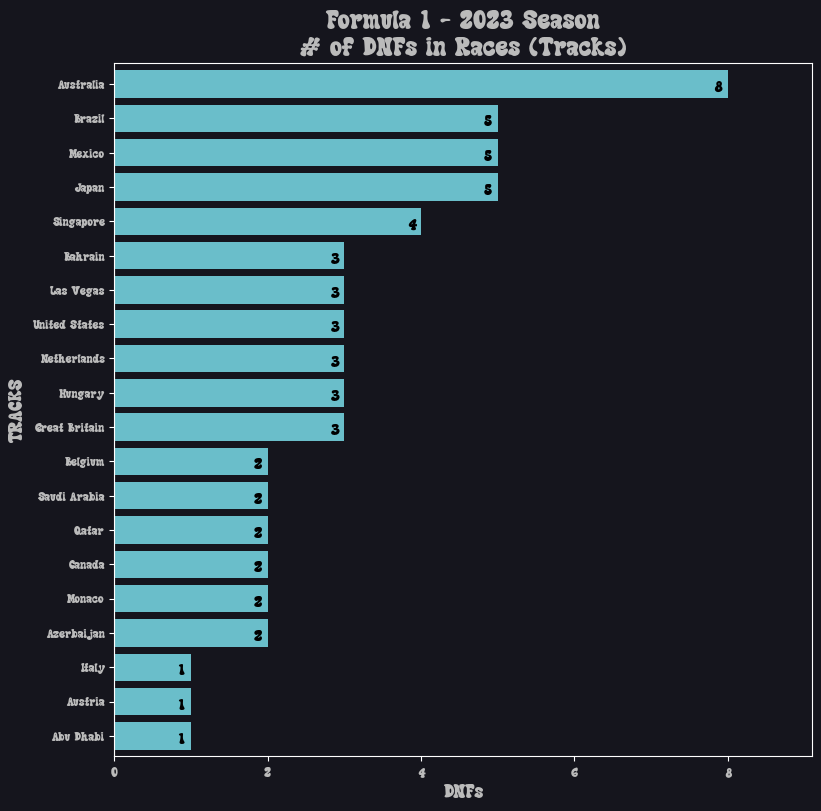

In [109]:
DNFtrack = Season2023RaceResults[Season2023RaceResults['Time/Retired'] == 'DNF']['Track'].value_counts()
plt.figure(figsize=(9,9))
plt.axis([0,9.1,19.6,-0.6])
plt.barh(DNFtrack.index, DNFtrack, color='#6abeca')
plt.title('Formula 1 - 2023 Season\n# of DNFs in Races (Tracks)', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFtrack)):
    plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TRACKS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

Within the 22-race long 2022 Season, we saw at least one driver becoming DNF, according to the bar chart above.

Among all of them, the **Australia** Grand Prix experienced the most DNFs this season, total of 8. Then, spectators in **Brazil, Mexico and Japan** saw five different drivers not completing the races individually.

On the other hand, only **Italy, Australia, Abu Dhabi GPs** had the least drivers completing the race this season with only one DNF. 

Beyond these DNFs, there are DNS (Did Not Start) incidents happened, such that the cars were not in good shape sufficiently to participate in the starting grid of the race session, due to serious damage occurred from the previous sessions and there wasn't enough time to fix everything; surely, this was disappointing for such drivers.

From the list below, only total of four DNSes appeared in 2023 Season and they were from the Italy, Singapore, Qutar and Brzail GP. Tsunoda, Stroll, Sainz and Leclerc were not able to race there completely!

In [112]:
Season2023RaceResults[Season2023RaceResults['Time/Retired'] == 'DNS'].set_index('Track')

Position  No           Driver                          Team  \
Track                                                                   
Italy           NC  22     Yuki Tsunoda         AlphaTauri Honda RBPT   
Singapore       NC  18     Lance Stroll  Aston Martin Aramco Mercedes   
Qatar           NC  55     Carlos Sainz                       Ferrari   
Brazil          NC  16  Charles Leclerc                       Ferrari   

           Starting Grid  Laps Time/Retired  Points Set Fastest Lap  \
Track                                                                 
Italy                 11     0          DNS       0              No   
Singapore             20     0          DNS       0              No   
Qatar                 12     0          DNS       0              No   
Brazil                 2     0          DNS       0              No   

          Fastest Lap Time  
Track                       
Italy                  NaN  
Singapore              NaN  
Qatar                  NaN  
Brazil                 NaN

And, another remarkable fact to show here is that there were such incidents where the drivers became DNF, but classified in the race results by traveling more than 90% of the race distance.

The list below indicates that total ofMORE than 10 different drivers individually had this aforementioned incidents.

In [114]:
Season2023RaceResults[(Season2023RaceResults['Time/Retired'] == 'DNF') & (Season2023RaceResults['Position'] != 'NC')] \
    .set_index('Track')

Position  No           Driver                          Team  \
Track                                                                       
Australia           13  10     Pierre Gasly                Alpine Renault   
Australia           14  31     Esteban Ocon                Alpine Renault   
Australia           15  21    Nyck De Vries         AlphaTauri Honda RBPT   
Australia           16   2   Logan Sargeant             Williams Mercedes   
Australia           17  20  Kevin Magnussen                  Haas Ferrari   
Monaco              19  20  Kevin Magnussen                  Haas Ferrari   
Great Britain       18  10     Pierre Gasly                Alpine Renault   
Hungary             18   2   Logan Sargeant             Williams Mercedes   
Singapore           16  63   George Russell                      Mercedes   
Mexico              16   2   Logan Sargeant             Williams Mercedes   
Mexico              17  18     Lance Stroll  Aston Martin Aramco Mercedes   
Las Vegas           18  22     Yuki Tsunoda         AlphaTauri Honda RBPT   
Las Vegas           19  27  Nico Hulkenberg                  Haas Ferrari   
Abu Dhabi           18  55     Carlos Sainz                       Ferrari   

               Starting Grid  Laps Time/Retired  Points Set Fastest Lap  \
Track                                                                     
Australia                  9    56          DNF       0              No   
Australia                 11    56          DNF       0              No   
Australia                 15    56          DNF       0              No   
Australia                 18    56          DNF       0              No   
Australia                 14    52          DNF       0              No   
Monaco                    17    70          DNF       0              No   
Great Britain             10    46          DNF       0              No   
Hungary                   20    67          DNF       0              No   
Singapore                  2    61          DNF       0              No   
Mexico                    19    70          DNF       0              No   
Mexico                    20    66          DNF       0              No   
Las Vegas                 20    46          DNF       0              No   
Las Vegas                 13    45          DNF       0              No   
Abu Dhabi                 16    57          DNF       0              No   

              Fastest Lap Time  
Track                           
Australia             1:20.995  
Australia             1:21.203  
Australia             1:21.183  
Australia             1:21.456  
Australia             1:21.685  
Monaco                1:18.351  
Great Britain         1:31.539  
Hungary               1:23.496  
Singapore             1:36.273  
Mexico                1:23.003  
Mexico                1:23.257  
Las Vegas             1:37.587  
Las Vegas             1:37.565  
Abu Dhabi             1:29.452

## 2023 Season - Driver of the Day Votes
Here comes the new section of F1 Data Analyses for the first time, Driver of the Day Votes. As you know, during the race session on Sunday, especially after when there are less than 20 laps remaining, a notification appears on the screen, telling you that you can vote for any driver from F1's official web site to place to the top of the list; and upon race completion, that driver who earned the DotD is announced.

No points are offered for the driver who was selected as Driver of the Day for any race. Nevertheless, it is a good accolade for them to remember, due to performing the best superb driving, amazing overtakes against rivals or just nice memorial things.

Below you can observe the complete list of Driver of the Day votes of all races in 2022 Season, including drivers in top 5 and their vote percentages:

In [116]:
Season2023DotdVotes

1st Place  1st Place(%)         2nd Place  2nd Place(%)  \
Track                                                                          
Bahrain        Fernando Alonso          53.3      Pierre Gasly           6.5   
Saudi Arabia    Max Verstappen          26.3      Sergio Perez          19.8   
Australia         Sergio Perez          21.3    Lewis Hamilton          14.3   
Azerbaijan        Sergio Perez          29.1   Fernando Alonso          14.3   
Miami           Max Verstappen          27.1      Sergio Perez          12.5   
Monaco            Esteban Ocon          23.5   Fernando Alonso          22.6   
Spain           Lewis Hamilton          24.7      Sergio Perez          19.2   
Canada         Alexander Albon          28.7    Lewis Hamilton          16.4   
Austria           Lando Norris          26.1      Carlos Sainz          22.4   
Great Britain     Lando Norris          45.5    Lewis Hamilton          12.1   
Hungary           Sergio Perez          20.7      Lando Norris          20.4   
Belgium         Max Verstappen          15.5   Charles Leclerc          14.8   
Netherlands    Fernando Alonso          20.9        Alex Albon          14.0   
Italy             Carlos Sainz          31.5      Sergio Perez          14.8   
Singapore         Carlos Sainz          21.2       Liam Lawson          14.4   
Japan            Oscar Piastri          28.2      Lando Norris          15.8   
Qatar            Oscar Piastri          27.9    George Russell          17.3   
United States     Lando Norris          26.0    Lewis Hamilton          23.3   
Mexico            Lando Norris          29.5  Daniel Ricciardo          21.6   
Brazil            Lando Norris          26.1   Fernando Alonso          24.7   
Las Vegas      Charles Leclerc          21.6      Sergio Perez          19.1   
Abu Dhabi         Yuki Tsunoda          24.2   Charles Leclerc          14.3   

                     3rd Place  3rd Place(%)        4th Place  4th Place(%)  \
Track                                                                         
Bahrain         Max Verstappen           6.3   Lewis Hamilton           5.5   
Saudi Arabia   Fernando Alonso          14.6  Charles Leclerc           7.2   
Australia         Pierre Gasly          10.3     Lando Norris           9.6   
Azerbaijan     Charles Leclerc          11.4   Lewis Hamilton           9.1   
Miami          Fernando Alonso           9.8   Lewis Hamilton           8.6   
Monaco          Max Verstappen          16.5   Lewis Hamilton           7.5   
Spain           George Russell          11.3   Max Verstappen          10.6   
Canada         Fernando Alonso          16.3   Max Verstappen           7.4   
Austria           Sergio Perez          21.8  Charles Leclerc           7.6   
Great Britain    Oscar Piastri          10.8     Sergio Perez           8.1   
Hungary          Oscar Piastri          13.7   George Russell           8.4   
Belgium           Yuki Tsunoda          14.6     Lando Norris           8.0   
Netherlands     Max Verstappen          10.9     Pierre Gasly           9.1   
Italy           Max Verstappen          13.3       Alex Albon          10.7   
Singapore         Lando Norris          13.6   George Russell           9.8   
Japan           Max Verstappen          14.4  Charles Leclerc           7.5   
Qatar             Lando Norris          16.4   Max Verstappen          11.4   
United States   Max Verstappen          14.4     Sergio Perez           7.5   
Mexico          Lewis Hamilton          12.2     Sergio Perez           8.3   
Brazil            Sergio Perez          15.8   Max Verstappen           6.0   
Las Vegas        Oscar Piastri          13.4   Max Verstappen          13.0   
Abu Dhabi         Sergio Perez          11.3     Lando Norris           9.7   

                     5th Place  5th Place(%)  
Track                                         
Bahrain        Charles Leclerc           4.4  
Saudi Arabia    Lewis Hamilton           6.7  
Australia      

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\3823703901.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DotdAppearanceDf[i]-0.7, i+0.25, "{:>3}".format(DotdAppearanceDf[i]), fontsize=12, fontweight='bold', color='k')


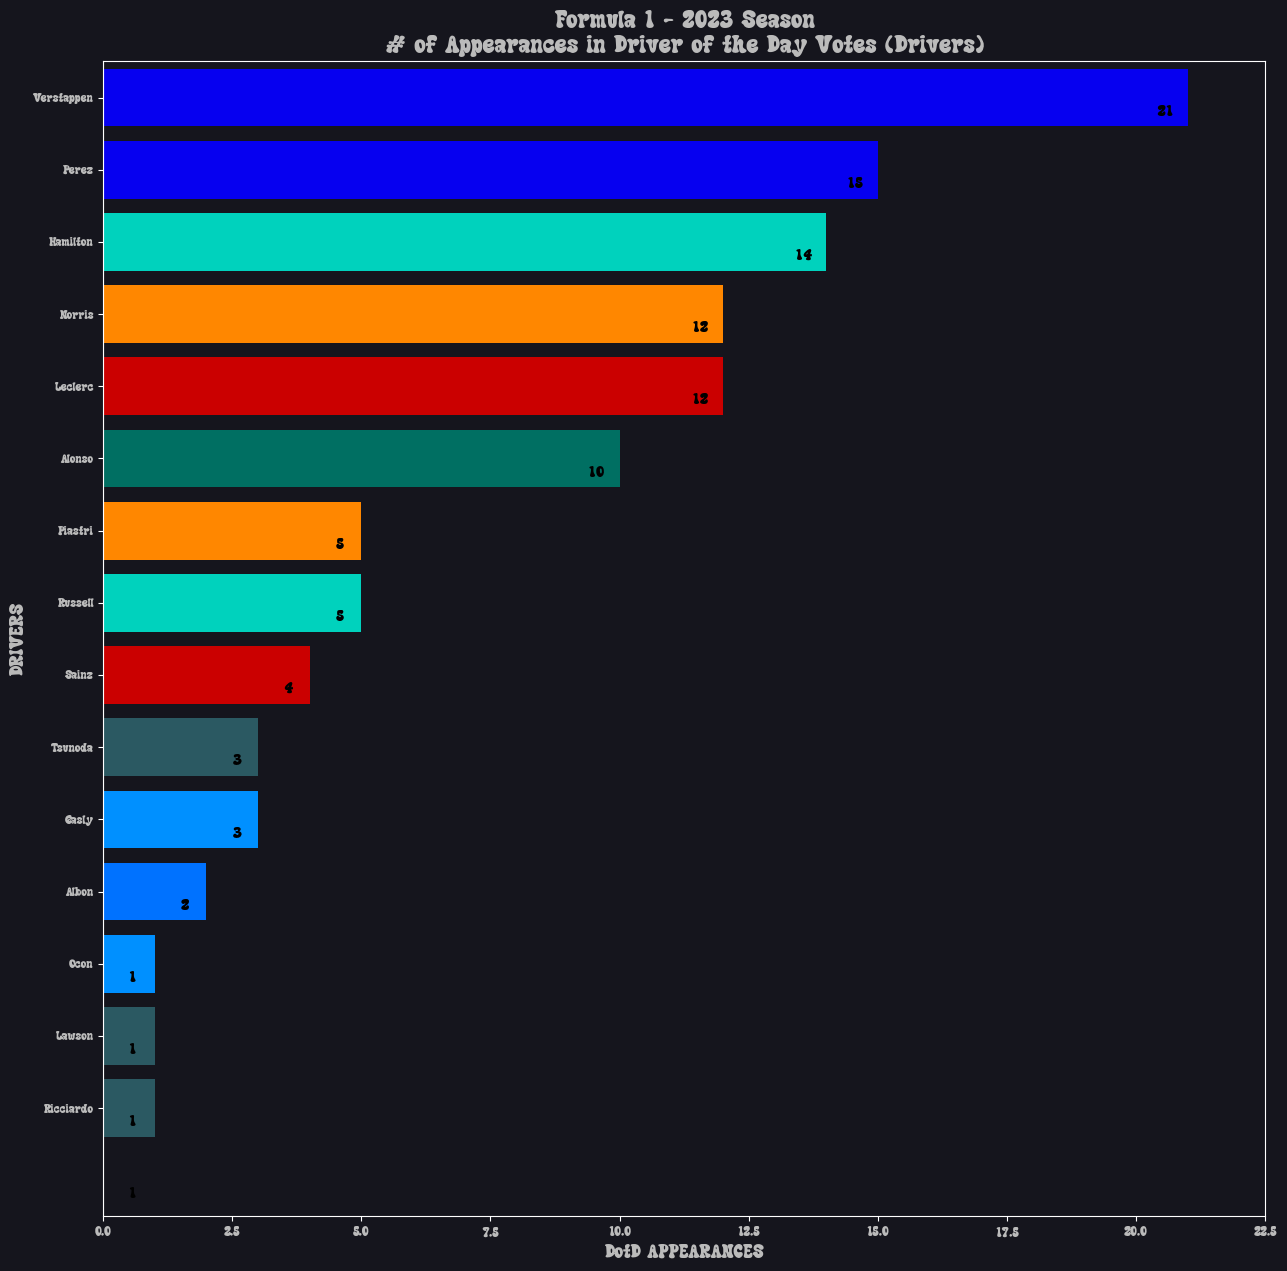

In [117]:
DotdAppearance = {}
for place in range(5):
    for driver in range(len(Season2023DotdVotes)):
        d = Season2023DotdVotes.iloc[driver,place*2]
        if d not in DotdAppearance.keys():   DotdAppearance[d] = 1
        else:   DotdAppearance[d] += 1
DotdAppearanceDf = pd.Series(DotdAppearance).sort_values(ascending=False)
c = assign_color('drivers', DotdAppearanceDf.index)
plt.figure(figsize=(15,15))
plt.axis([0,22.5,15.5,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAppearanceDf.index], DotdAppearanceDf, color=c)
for i in range(len(DotdAppearanceDf)):
    plt.text(DotdAppearanceDf[i]-0.7, i+0.25, "{:>3}".format(DotdAppearanceDf[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2023 Season\n# of Appearances in Driver of the Day Votes (Drivers)', fontsize=18, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('DotD APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

## 2023 Season - Total Laps & Distance Driven in Race Sessions

C:\Users\myloc\AppData\Local\Temp\ipykernel_15912\3227233568.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(driversTotalLaps[i]-28, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')


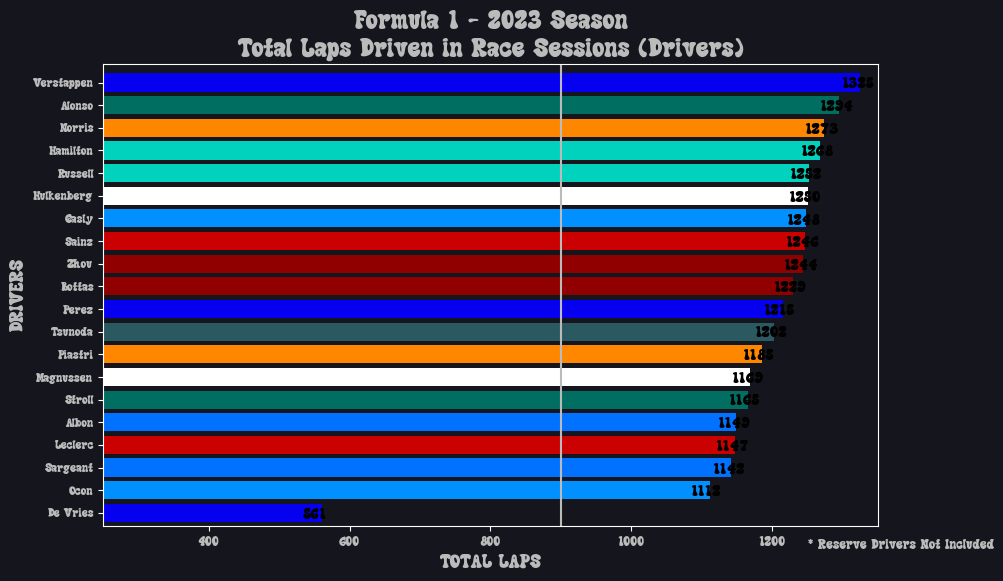

In [119]:
driversTotalLaps = Season2023RaceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)[:20]
c = assign_color('drivers', driversTotalLaps.index)
plt.figure(figsize=(10,6))
plt.axis([250,1350,19.6,-0.8])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalLaps.index], driversTotalLaps, color=c)
for i in range(len(driversTotalLaps)):
    plt.text(driversTotalLaps[i]-28, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')
plt.text(1250, 20.6, "* Reserve Drivers Not Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2023 Season\nTotal Laps Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold', 
          color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(900, color='#bbbbbb')
plt.show()

* In conclusion the  2023 Formula 1 season was dominated by Red Bull Racing, with Max Verstappen securing his third consecutive World Championship title in commanding fashion. Red Bull's RB19 proved to be the class of the field, showcasing remarkable speed and consistency throughout the year, with Verstappen winning the majority of the races. His teammate, Sergio Pérez, also had strong performances, helping Red Bull clinch the Constructors' Championship early in the season. 
* Mercedes and Ferrari remained competitive but were unable to consistently challenge Red Bull, with Lewis Hamilton and Charles Leclerc showing flashes of brilliance. Aston Martin, led by Fernando Alonso, made significant strides, particularly early in the season, securing multiple podium finishes.    * McLaren, after a slow start, surged back with impressive results, especially from Lando Norris and rookie Oscar Piastri. The season also saw intense midfield battles, with teams like Alpine and AlphaTauri fighting for crucial points.
* Overall, the 2023 season was defined by Red Bull’s dominance, Verstappen's record-breaking performances, and the promise of tighter competition in the seasons to come.

## End of my 2023 F1 Analysis 🏁

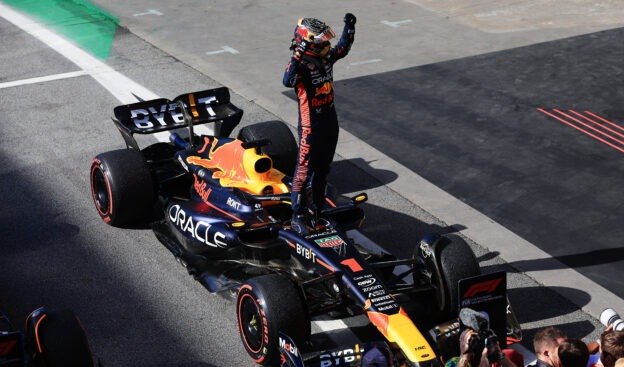

In [122]:
from IPython.display import Image
Image(r'C:\Users\myloc\Downloads\maxB.jpg')